In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [133]:
data=100
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
m2=-1
lam=1
c_reg1=0.1
c_reg2=0.0001

<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([1.01902152, 2.15579387, 0.44248635, 0.89566665, 2.63214246,
       0.69529679, 3.06222965, 4.82100984, 5.8513218 , 9.46391951])>
tf.Tensor(
[ 3.01490951  3.02722263  3.04978824  3.09134316  3.16854751  3.31437385
  3.59861219  4.18820179  5.58607614 10.29821491], shape=(10,), dtype=float64)


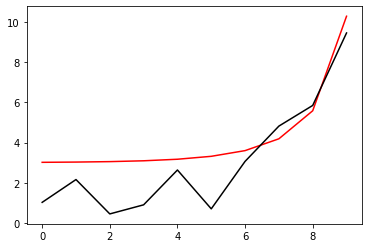

In [134]:
h=tf.zeros(layer)
h_in=[]
#h_in=[3.0205426, 3.022307 , 3.0291433, 3.04402  , 3.0732646, 3.131582 ,
# 3.2585216, 3.5762587, 4.59116  , 9.752249]
for i in range (layer):
#   midd=np.float64(10.0)
#    h_in.append(midd)
#    midd=3*coth(3*((i-layer)*dn)).numpy()
#    h_in.append(midd)
    mu=1/(1-i/10)
    h_inn=np.float64(np.random.normal(mu, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
print(h)

h_real=tf.zeros(layer)
middd=[]
for i in range (layer):
    midd=3*coth(3*((i-layer)*dn)).numpy()
    middd.append(midd)
h_real=tf.constant(middd)
print(h_real)
plt.plot(h_real, 'r-')
plt.plot(h.numpy(), 'k-')
plt.show()

In [135]:
m2=tf.constant(np.float64(-1.0))
m2_2=tf.Variable(np.float64(np.random.uniform(-1.5, -0.5)))
print(m2_2)

lam=tf.constant(np.float64(1.0))
lam2=tf.Variable(np.float64(np.random.uniform(0.5, 1.5)))
print(lam2)

<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=-1.086795325279326>
<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.6470652390212022>


In [119]:
def F_func(m, la, a,b):
    return 2*b/n_fin-m*a-la*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

In [120]:
def LP2(hh, m, la, phi, pi):
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m*dn+(1-dn*hh[j])*pi+dn*la*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_p(hh, m, la):
    Positive=[]
    while len(Positive)<data:
        phi1=np.random.uniform(0.0, 1.5, 10000)
        pi1=np.random.uniform(-0.2, 0.2, 10000)
        phi_1, pi_1=LP2(hh, m, la, phi1, pi1)
        for i in range (10000):
            if len(Positive)>=100: break
            if tf.math.abs(F_func(m, la, phi_1[i], pi_1[i]))<0.1: Positive.append([phi1[i], pi1[i]])
            else: continue
    return Positive
def NN_func_n(hh, m, la):
    Negative=[]
    while len(Negative)<data:
        phi1=np.random.uniform(0.0, 1.5, 200)
        pi1=np.random.uniform(-0.2, 0.2, 200)
        phi_1, pi_1 = LP2(hh, m, la, phi1, pi1)
        for i in range (200):
            if len(Negative)>=100: break
            if tf.math.abs(F_func(m, la, phi_1[i], pi_1[i]))>=0.1: Negative.append([phi1[i], pi1[i]])
            else: continue
    return Negative
def NN_func_01(hh, m, la, list1):
    PP=[]
    NN=[]
    for i in range (data):
        phi=list1[i][0]
        pi=list1[i][1]
        if tf.math.abs(LP2(hh, m, la, phi, pi)[1])<0.1: PP.append([phi, pi])
        else: NN.append([phi, pi])
    return PP, NN

In [121]:
for i in range (10):
    Positive[i]=NN_func_p(h_real, m2, lam)
    Negative[i]=NN_func_n(h_real, m2, lam)

In [122]:
for i in range (10):
    [Positive0[i], Positive1[i]]=NN_func_01(h, m2_2, lam2, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, m2_2, lam2, Negative[i])

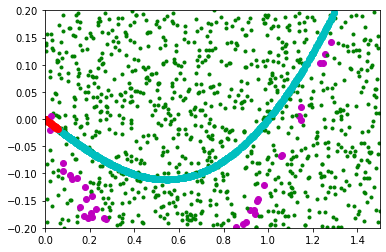

In [123]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
x_data3=[]
y_data3=[]
x_data4=[]
y_data4=[]
for i in range (10):
    x_data1.insert(i, [v[0] for v in Positive0[i]])
    y_data1.insert(i, [v[1] for v in Positive0[i]])
    x_data2.insert(i, [v[0] for v in Positive1[i]])
    y_data2.insert(i, [v[1] for v in Positive1[i]])
    x_data3.insert(i, [v[0] for v in Negative0[i]])
    y_data3.insert(i, [v[1] for v in Negative0[i]])
    x_data4.insert(i, [v[0] for v in Negative1[i]])
    y_data4.insert(i, [v[1] for v in Negative1[i]])
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [124]:
def Error_func(hh, m, la, list1, list2):
    phi0=np.array([v[0] for v in list1])
    pi0=np.array([v[1] for v in list1])
    phi1=np.array([v[0] for v in list2])
    pi1=np.array([v[1] for v in list2])
    phi_0, pi_0=LP2(hh, m, la, phi0, pi0)
    phi_1, pi_1=LP2(hh, m, la, phi1, pi1)
    PPlist=t_func(pi_0)
    NNlist=t_func(pi_1)
    sum_p=sum(PPlist)
    sum_n=data-sum(NNlist)

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return E_reg1+E_reg2+sum_p+sum_n

In [125]:
for i in range (10):
    print(Error_func(h_real, m2, lam, Positive[i], Negative[i]))
for i in range (10):
    print(Error_func(h, m2_2, lam2, Positive[i], Negative[i]))

tf.Tensor(5.009337288588924, shape=(), dtype=float64)
tf.Tensor(2.472379757106024, shape=(), dtype=float64)
tf.Tensor(2.484154243145666, shape=(), dtype=float64)
tf.Tensor(1.3245676114474692, shape=(), dtype=float64)
tf.Tensor(2.0094634372917692, shape=(), dtype=float64)
tf.Tensor(2.99925963507927, shape=(), dtype=float64)
tf.Tensor(1.996923466438987, shape=(), dtype=float64)
tf.Tensor(2.00264941360914, shape=(), dtype=float64)
tf.Tensor(1.0155828856820495, shape=(), dtype=float64)
tf.Tensor(4.99597613298352, shape=(), dtype=float64)
tf.Tensor(94.41952747819447, shape=(), dtype=float64)
tf.Tensor(98.8668886884097, shape=(), dtype=float64)
tf.Tensor(91.59336528024605, shape=(), dtype=float64)
tf.Tensor(94.51087135131341, shape=(), dtype=float64)
tf.Tensor(104.22537036742511, shape=(), dtype=float64)
tf.Tensor(94.99545502492816, shape=(), dtype=float64)
tf.Tensor(96.52652990251939, shape=(), dtype=float64)
tf.Tensor(99.4920689788054, shape=(), dtype=float64)
tf.Tensor(102.13891036776126,

In [126]:
def run(i):
    with tf.GradientTape() as g:
        loss=Error_func(h, m2_2, lam2, Positive[i], Negative[i])
        gradients=g.gradient(loss, [h, m2_2, lam2])
    optimizer.apply_gradients(zip(gradients, [h, m2_2, lam2]))

201 99.00966039237564 -1.0787689760834174 0.637328807138711
[1.07433816 2.16316998 0.51222973 0.94983398 2.65109611 0.7514699
 3.0806625  4.81890614 5.83004048 9.26690904]


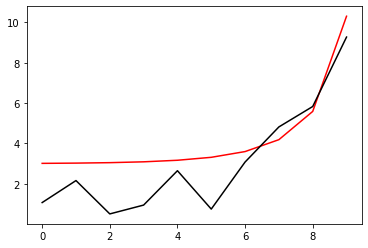

402 97.72493665038485 -1.0772505606312006 0.6374148265515287
[1.0857027  2.11346782 0.54353633 0.95954078 2.61396298 0.764694
 3.04433891 4.76928386 5.77340021 9.07782391]


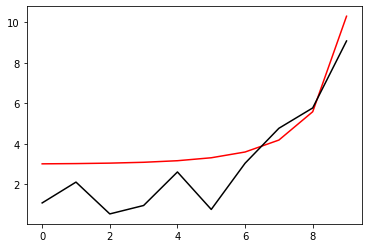

603 102.53996558879932 -1.074220267323885 0.638380503951052
[1.10168475 2.06875114 0.57981121 0.97404416 2.58038937 0.78302938
 3.01146392 4.72316353 5.72092771 8.89646972]


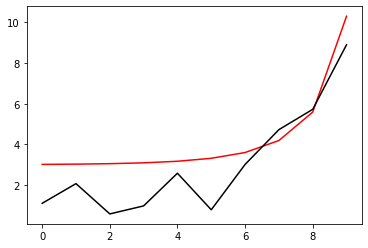

804 100.18314904235909 -1.0747003649885334 0.6366624573664558
[1.11159677 2.02147648 0.61182178 0.98576698 2.5449024  0.79997618
 2.97751333 4.67714727 5.67041315 8.72303175]


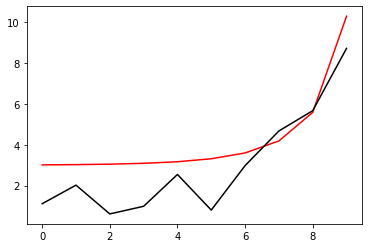

1005 91.1194691639019 -1.0745797527437482 0.635050981353815
[1.12068368 1.980347   0.64571291 1.00281325 2.51868587 0.82445859
 2.95323864 4.63900829 5.62548602 8.55750383]


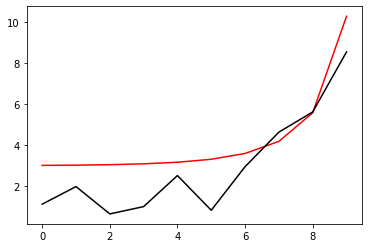

1206 94.80795649814414 -1.0735710426657714 0.6353241411152208
[1.12484782 1.93794295 0.6733384  1.01456723 2.48854473 0.84242246
 2.92348188 4.59567258 5.57661706 8.39983621]


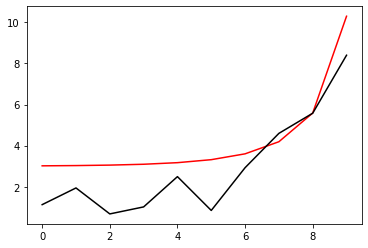

1407 99.60163804534905 -1.0719594997130162 0.6357011569587958
[1.13034709 1.90142014 0.70215345 1.02947692 2.46416903 0.86376863
 2.89890952 4.55641757 5.53061458 8.25001103]


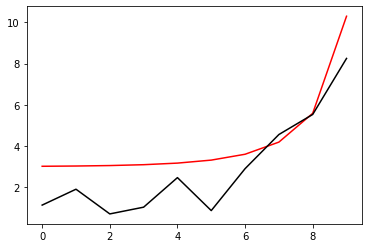

1608 99.00961265352541 -1.0717398396578606 0.6346087728703252
[1.13345714 1.86710314 0.72908474 1.04444321 2.44239066 0.88531999
 2.87610074 4.51781598 5.48421931 8.10794271]


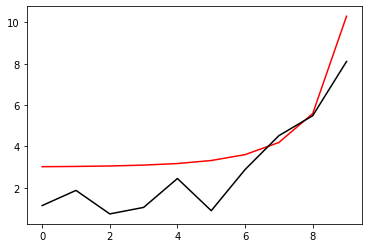

1809 100.52219654817077 -1.0705906967913277 0.6342569600989574
[1.13647574 1.83596523 0.75487197 1.0593539  2.42225345 0.90575917
 2.85312153 4.47778603 5.43553079 7.97366969]


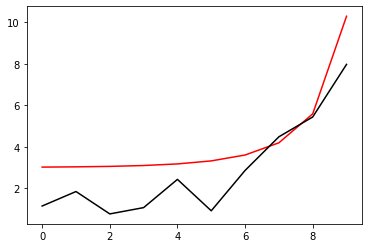

2010 97.08267089190458 -1.0698472424661019 0.633375006244632
[1.13864812 1.80685235 0.77896423 1.07350984 2.40276653 0.92443124
 2.82899941 4.43552705 5.38411444 7.84679464]


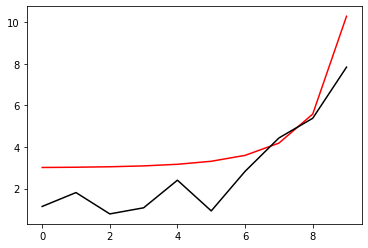

2211 98.46040291868147 -1.0689928623120397 0.6327995330148247
[1.13951    1.77930087 0.80166371 1.0874887  2.38486047 0.94309157
 2.80640567 4.39476897 5.33417397 7.72733878]


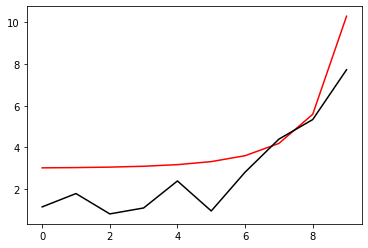

2412 97.8354801371562 -1.0682863429429552 0.6324550373161092
[1.13877399 1.7529201  0.82309775 1.1015358  2.36896565 0.96268559
 2.78692434 4.3578919  5.28842978 7.61565136]


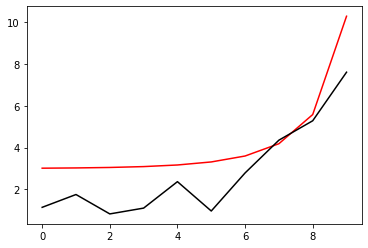

2613 101.93522913207295 -1.0677589682316835 0.6323386580557699
[1.13658606 1.72766858 0.8435378  1.1158996  2.35532256 0.98366921
 2.77120503 4.32585904 5.24793138 7.51229381]


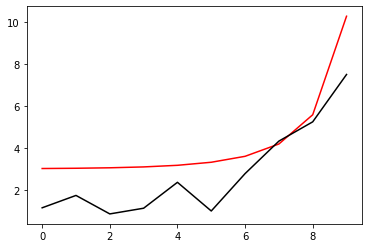

2814 99.6477434871109 -1.0672960382347185 0.6321601830376626
[1.13416343 1.70415715 0.86345594 1.13056533 2.34329541 1.00491695
 2.75706839 4.29555846 5.20913973 7.41767492]


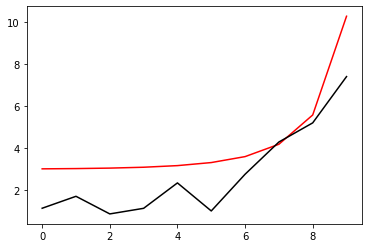

3015 90.5486570610221 -1.0668053875575125 0.6318167474763934
[1.13199119 1.68232539 0.8826995  1.14493584 2.33169338 1.02485077
 2.74194336 4.2637011  5.16865293 7.33156759]


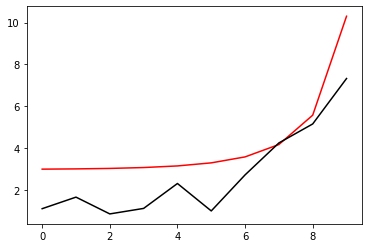

3216 94.361798377835 -1.065965510569901 0.631717718005519
[1.12979795 1.66172523 0.90103045 1.15868718 2.32003185 1.04307026
 2.72519086 4.22965375 5.12601463 7.25339727]


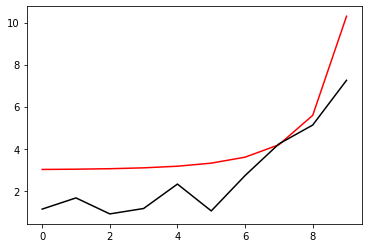

3417 99.58656220931647 -1.0652389880643316 0.6313796425097492
[1.1274888  1.64209078 0.91835221 1.1716412  2.30799303 1.05932329
 2.70638165 4.19305654 5.0810625  7.18244825]


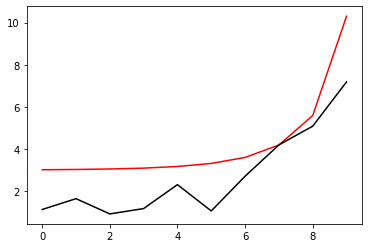

3618 98.40858907731814 -1.064388614327023 0.6309893141077623
[1.12534207 1.62356899 0.93499117 1.18407651 2.29575507 1.07386223
 2.68564023 4.15409315 5.03406763 7.11793112]


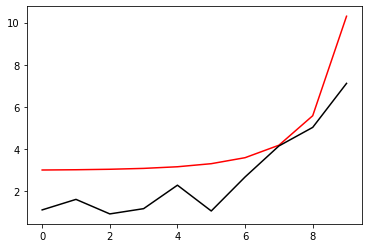

3819 100.77516653379121 -1.0634699409862491 0.6305729211274828
[1.12333363 1.60607009 0.95110228 1.19620798 2.28359919 1.08727686
 2.6638683  4.11419725 4.98674137 7.05913665]


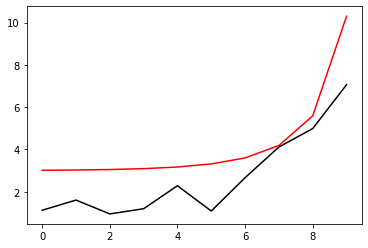

4020 96.78269148746502 -1.0625345960111905 0.6301170177525797
[1.12147654 1.58955726 0.96686641 1.20824942 2.2717464  1.09998477
 2.64162329 4.0742162  4.94002451 7.00554691]


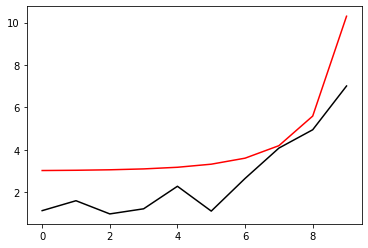

4221 98.20144296946637 -1.0616116681657417 0.6296516248824068
[1.11964576 1.57383937 0.98226643 1.22018295 2.26014114 1.11206744
 2.61906394 4.03451957 4.89433089 6.95674765]


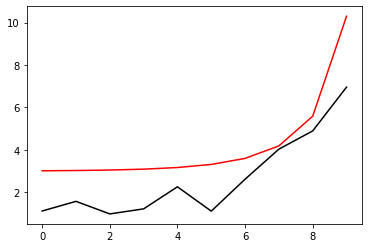

4422 98.02673759176754 -1.0609128348559194 0.6289542565179154
[1.11774199 1.55876169 0.99730754 1.23199632 2.24869001 1.12348736
 2.59609378 3.9950221  4.84948799 6.91225625]


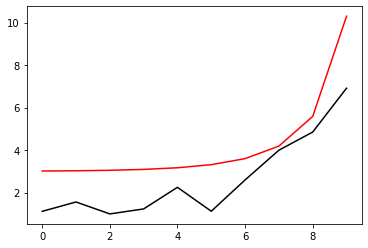

4623 101.49625612289479 -1.0601425810078902 0.6282717021279067
[1.11584351 1.54435562 1.01216764 1.24382637 2.23739199 1.13419825
 2.57243954 3.95524621 4.80480595 6.87144149]


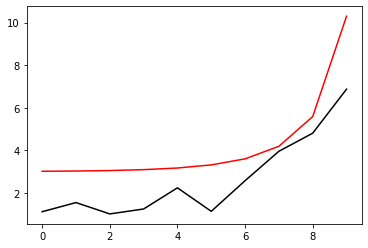

4824 99.05647800945971 -1.0592782185832292 0.627574588804608
[1.11397616 1.53061929 1.02700967 1.25582307 2.22629563 1.14425288
 2.54802183 3.91497151 4.75987287 6.83354797]


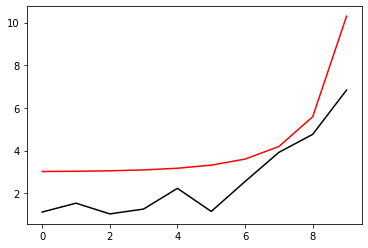

In [136]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 5001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 98.11444197572139 -1.0572950860156736 0.6271639490248594
[1.11067753 1.50823807 1.05306361 1.27707848 2.20643402 1.15797215
 2.50321466 3.84782815 4.68646565 6.73287235]


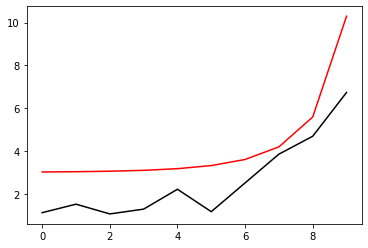

402 98.09974079574532 -1.0566646528660355 0.6265305602378519
[1.10845348 1.49708498 1.0658968  1.2877871  2.19685659 1.16440551
 2.48368804 3.81953068 4.65560667 6.71288304]


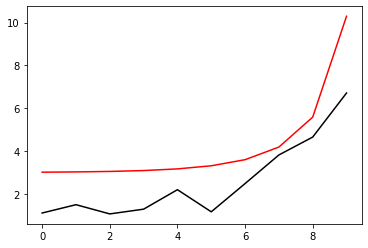

603 101.09277305811929 -1.055903540142897 0.6259244292631082
[1.10633836 1.48656859 1.07894634 1.2989054  2.18782073 1.17073709
 2.46407936 3.79084749 4.62411752 6.69316372]


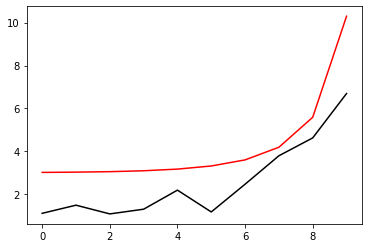

804 98.79991173116952 -1.0550374387540908 0.6253026634737362
[1.10425514 1.47658924 1.09223929 1.3104474  2.17924868 1.1769121
 2.44430799 3.76167122 4.59182808 6.67313386]


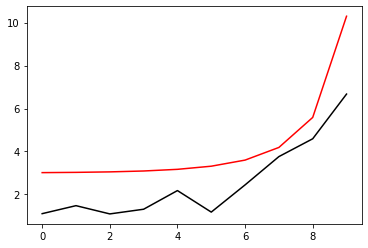

1005 90.17684008208562 -1.05394645636539 0.6247234885599886
[1.10246008 1.46736987 1.10601759 1.32260709 2.17124217 1.18295422
 2.42431423 3.73185846 4.55851454 6.65251812]


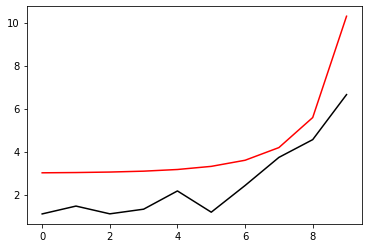

1206 94.81800613668226 -1.0525092160724194 0.6241798286636339
[1.10143176 1.45930183 1.12062835 1.3355897  2.16377195 1.18862246
 2.40363897 3.70081719 4.52349065 6.63084896]


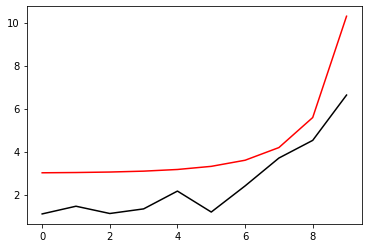

1407 99.84524671430762 -1.0502760757278524 0.6232913893999918
[1.10511648 1.45584619 1.13910591 1.35162977 2.15779286 1.19360534
 2.38052625 3.66591379 4.48362955 6.60638424]


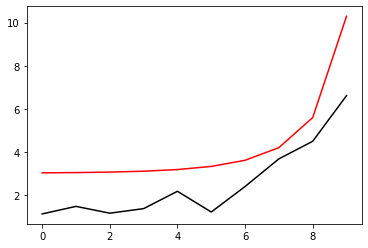

1608 97.51065370139375 -1.0461273372123705 0.6211488031779033
[1.12137226 1.46325307 1.16620211 1.37254823 2.1504063  1.191137
 2.34438282 3.61523202 4.42664594 6.57173448]


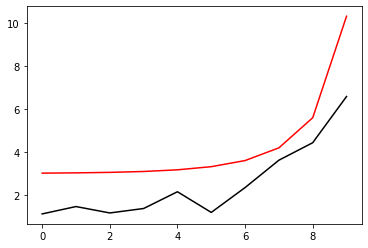

1809 101.65281409444403 -1.0408385329482148 0.6177832912786321
[1.14133509 1.47306063 1.19453647 1.39081375 2.13268971 1.17273934
 2.28745574 3.54294245 4.34815458 6.52352213]


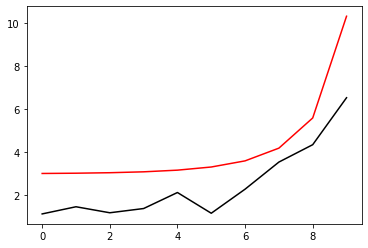

2010 96.36374297907254 -1.0363943644770333 0.6153201181329261
[1.14708473 1.46879796 1.20984457 1.39606269 2.10126799 1.14227218
 2.22079749 3.46377025 4.26475573 6.47202022]


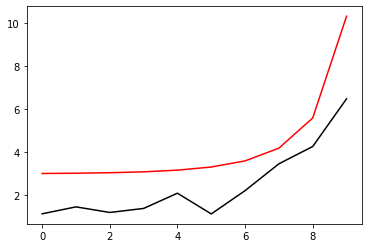

2211 97.92800668865475 -1.0327526630544386 0.6133269606495716
[1.14494965 1.4586299  1.22022992 1.39888632 2.07122001 1.11473793
 2.157752   3.38766328 4.18418841 6.42229558]


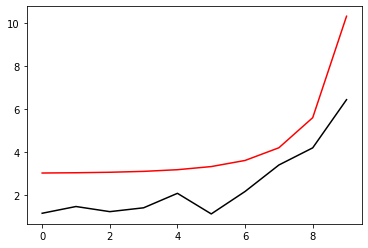

2412 97.67346536377374 -1.0293213931650171 0.611287501407387
[1.14151229 1.44932344 1.23058191 1.40373088 2.04734719 1.09266992
 2.0987697  3.31237278 4.1027316  6.37213004]


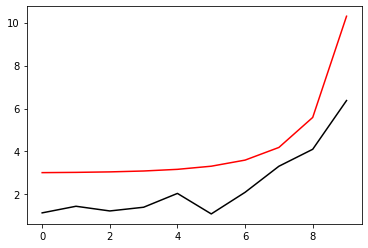

2613 98.74379033417272 -1.0252800101356698 0.6092553205188855
[1.13953632 1.4427718  1.24096376 1.40925002 2.02717094 1.07165712
 2.03849028 3.23056605 4.01191708 6.31636816]


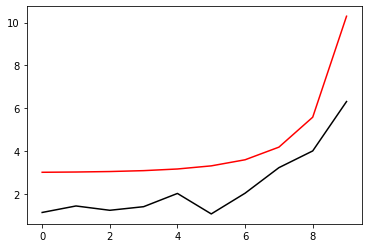

2814 98.16565875824665 -1.0179292275939482 0.606040968260987
[1.15091772 1.44981733 1.26055068 1.42238516 2.01429508 1.05062957
 1.969951   3.12798666 3.8923897  6.24338092]


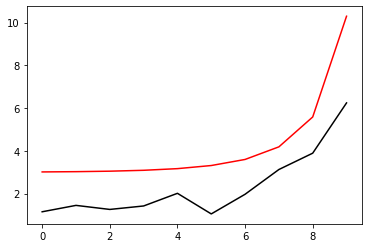

3015 90.01136813739004 -0.9773095274704672 0.606790466402334
[1.26190029 1.55473899 1.36994067 1.51731851 2.07021258 1.07206274
 1.90231307 2.98298685 3.70367379 6.12711284]


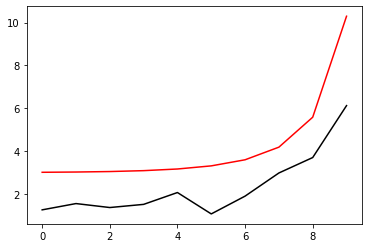

3216 88.69039139008032 -0.9631305885340612 0.5956751425618236
[1.32184893 1.60912222 1.43017669 1.56934357 2.09595882 1.0811425
 1.84998794 2.88401445 3.58511568 6.05344175]


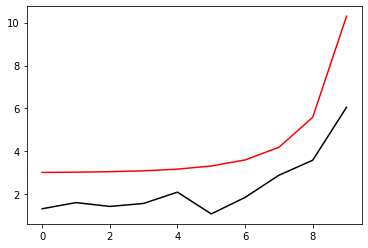

3417 96.92166692119316 -0.9457985194485182 0.5902893165774922
[1.37825663 1.66056136 1.48857452 1.62240144 2.12750958 1.10280354
 1.81650096 2.81015647 3.4954662  5.99718334]


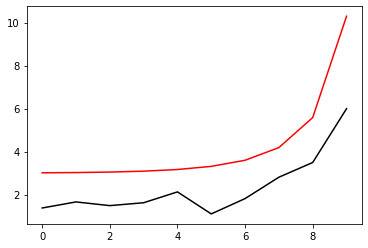

3618 88.42821634335033 -0.9249225233219205 0.5794152258047798
[1.45815589 1.74144811 1.58113924 1.71676524 2.21091949 1.18550717
 1.84898146 2.78719323 3.43968009 5.96374006]


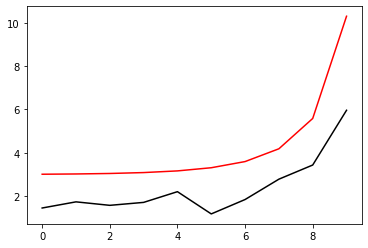

3819 94.9474582620756 -0.9029617123086379 0.5727563105118543
[1.51881888 1.79731906 1.64235593 1.77112107 2.24153974 1.20045345
 1.80223874 2.69688876 3.3341149  5.89932616]


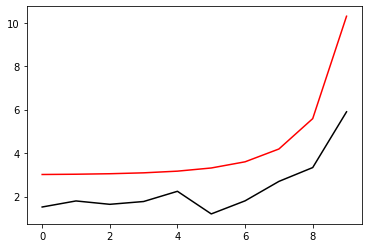

4020 48.73316614486086 -0.7312039412676493 0.5875893654113584
[1.83586819 2.11415123 1.95788822 2.08297789 2.54054738 1.46862486
 1.94569481 2.64481712 3.16796371 5.79593116]


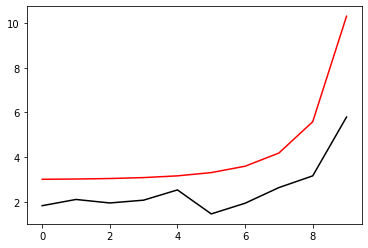

4221 6.6315362075981055 -0.6634545578076197 0.6787234623608349
[1.79260814 2.06825517 1.91662291 2.04081536 2.49207706 1.42533725
 1.8914283  2.57936874 3.11262259 5.76067371]


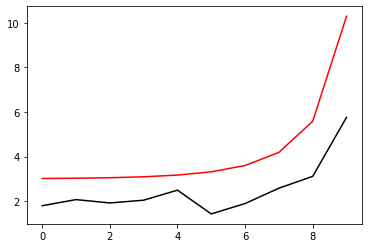

4422 9.439056745395156 -0.6690686607087747 0.6830958244913885
[1.79368838 2.07191878 1.93194103 2.06591986 2.52714518 1.48676195
 1.97561071 2.68577383 3.22406894 5.82937065]


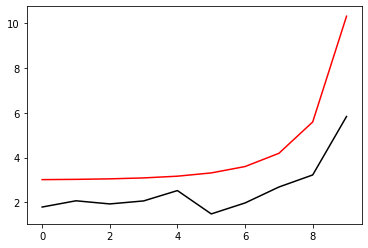

4623 3.4759643012236494 -0.674941188211846 0.6883773049084925
[1.79208181 2.07309849 1.9455174  2.08955458 2.56047875 1.54599618
 2.05521183 2.78495827 3.32880111 5.89392481]


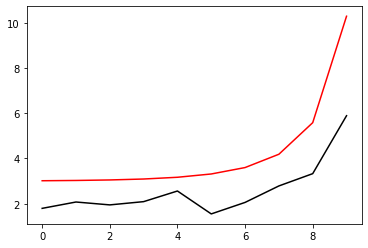

4824 4.584275235043499 -0.6807751975951588 0.6936094187009699
[1.78971393 2.0732182  1.95825363 2.11217062 2.59210395 1.60277345
 2.13014852 2.87753844 3.42727244 5.95459116]


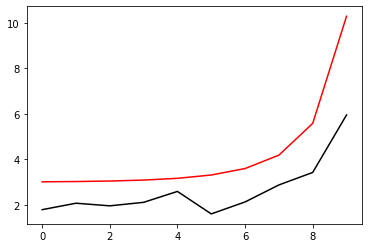

In [137]:
optimizer=tf.optimizers.Adam(learning_rate=0.00075)
for i in range (1, 5001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 6.0906442566166765 -0.69144073604024 0.7026244636696436
[1.7831661  2.07041752 1.98000187 2.15251656 2.64819432 1.70320851
 2.25825487 3.03219492 3.59294069 6.05649938]


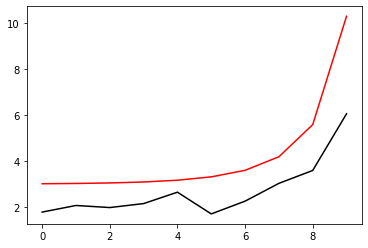

402 8.136041470360723 -0.6969736402998294 0.7076156315208081
[1.77748962 2.06696025 1.99091621 2.17438052 2.6790564  1.75724691
 2.32493949 3.11014224 3.6760754  6.10777734]


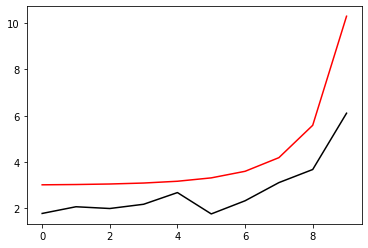

603 3.024032659550848 -0.7020405889932082 0.712519998629612
[1.77334835 2.06492498 2.00385673 2.198469   2.711874   1.81256927
 2.39154902 3.1868632  3.75770901 6.15813039]


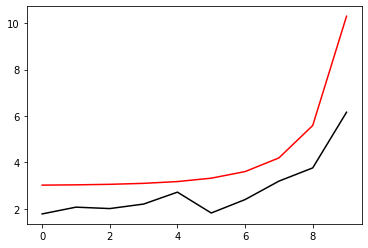

804 4.0569831373169265 -0.7064168515199201 0.7167837745536075
[1.77173355 2.06467165 2.0183291  2.22328774 2.74395105 1.8656785
 2.45368755 3.25737518 3.83233788 6.20415094]


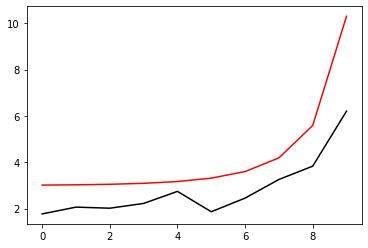

1005 3.3652252386067407 -0.7105628555867766 0.7206160064219468
[1.77077295 2.06439091 2.03254682 2.24710053 2.77360302 1.9154654
 2.51071626 3.32152515 3.90000438 6.24584101]


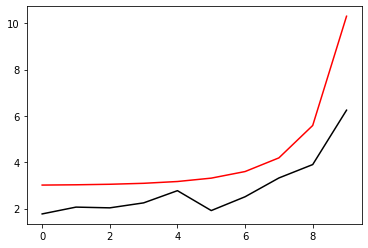

1206 5.767115206240179 -0.714937597213505 0.7243750644125599
[1.76937991 2.06351629 2.04648448 2.27057906 2.80232354 1.96428831
 2.56585858 3.38309813 3.96470136 6.28566433]


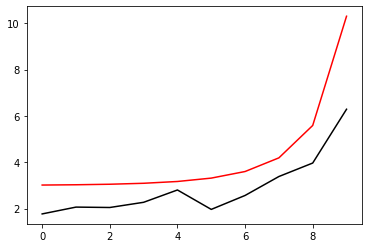

1407 4.7121336302244075 -0.7197936207819977 0.7283068809537814
[1.76761823 2.06273265 2.06136926 2.29571285 2.8330467  2.01564511
 2.62335574 3.44667463 4.03107586 6.32650993]


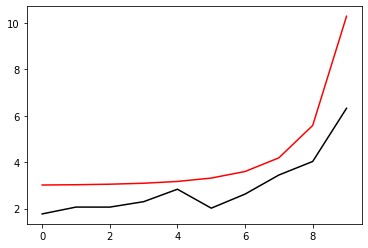

1608 2.399670143122986 -0.7251259890221534 0.7323833290079723
[1.76559728 2.06264777 2.07814875 2.32392175 2.86779645 2.0716731
 2.68573238 3.51491975 4.10183563 6.37001845]


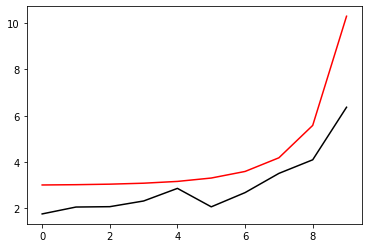

1809 6.0546617104015015 -0.7303591426299832 0.7366050148383895
[1.76184352 2.06217996 2.096007   2.35453057 2.90590526 2.13139829
 2.75175495 3.58641841 4.17554852 6.41540612]


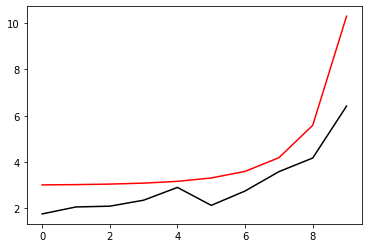

2010 7.082184365304944 -0.7344646284715125 0.7404168765617831
[1.75744338 2.06085336 2.11294524 2.38385591 2.94172252 2.18802007
 2.81319425 3.65232568 4.24324403 6.45716141]


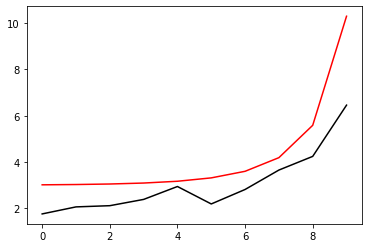

2211 4.132539634102764 -0.737873929117706 0.7434725868047775
[1.75296415 2.05820405 2.12756765 2.40964084 2.97211232 2.23845817
 2.86676604 3.70950385 4.30194374 6.49334571]


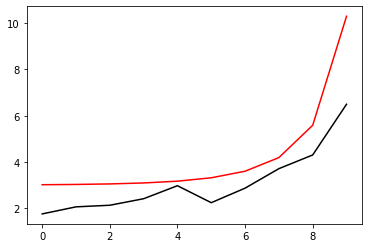

2412 5.450578220120052 -0.7405899021764084 0.747586460897501
[1.74311465 2.04980043 2.13631998 2.42951981 2.99603894 2.2833689
 2.91449193 3.76100555 4.35529146 6.52618975]


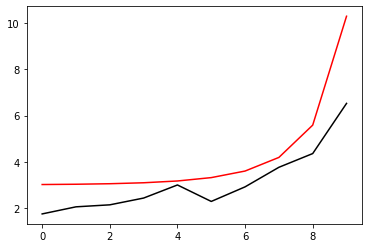

2613 2.8870229838257093 -0.744819197063587 0.7509453824655592
[1.72917758 2.03844566 2.14251398 2.44843756 3.02074672 2.33086428
 2.96566374 3.8162001  4.4122709  6.56126182]


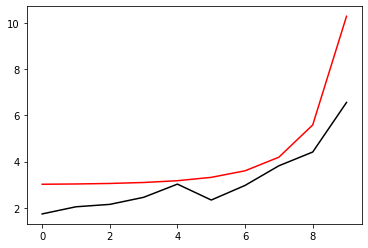

2814 2.267285769006468 -0.7474867036147474 0.7532194841286122
[1.72508273 2.03499542 2.15398816 2.47043768 3.04640438 2.37791177
 3.01473923 3.86807494 4.46509678 6.59376474]


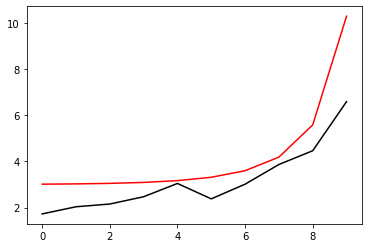

3015 3.0643952020150302 -0.7498284873398032 0.7552246347483038
[1.72286518 2.03233415 2.16479071 2.49064046 3.06920257 2.42236884
 3.06088754 3.91698263 4.51494726 6.6244429 ]


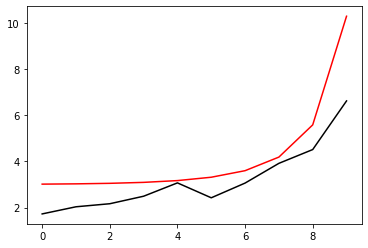

3216 3.63867177374865 -0.7518710667775168 0.7569725865821706
[1.72252539 2.03092992 2.17584936 2.51027578 3.09061713 2.46558742
 3.10551504 3.96428951 4.56312559 6.65406967]


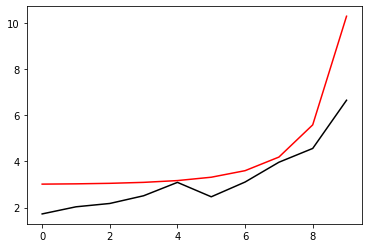

3417 4.035716727169493 -0.7537320920479059 0.7585284969692322
[1.72340607 2.03051166 2.18723929 2.52970358 3.11130551 2.50815687
 3.14942066 4.01096246 4.61072056 6.68335038]


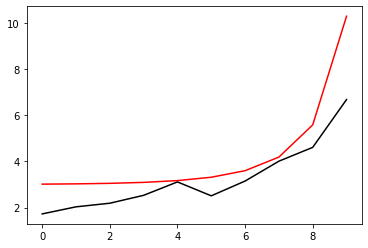

3618 2.061333600301132 -0.7555798578062283 0.7600295260188611
[1.72431764 2.03022905 2.19825698 2.54845739 3.1311666  2.54999911
 3.19291783 4.05769503 4.65872839 6.71290663]


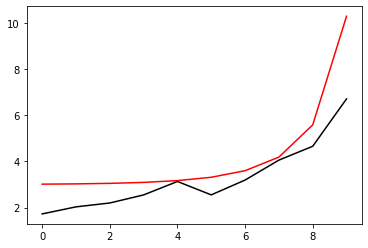

3819 6.052324309854759 -0.757407710035813 0.7615491185623555
[1.72433362 2.02923594 2.20767877 2.56515554 3.14885439 2.58954087
 3.23458511 4.10333789 4.7062794  6.74221723]


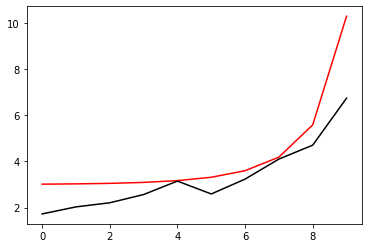

4020 7.071444475021052 -0.7590462362201573 0.7630019958340041
[1.72364397 2.0274991  2.21496085 2.57879433 3.16298426 2.6247647
 3.27205139 4.14538211 4.75089146 6.7697397 ]


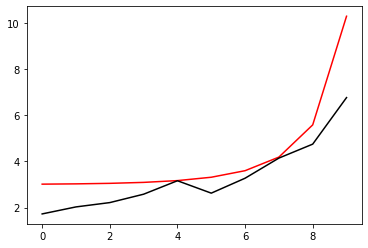

4221 2.5393606996915876 -0.7606096621085435 0.7641290184249584
[1.7229112  2.02553182 2.2206513  2.58979194 3.1737517  2.65544431
 3.30467786 4.18285388 4.79143918 6.79469816]


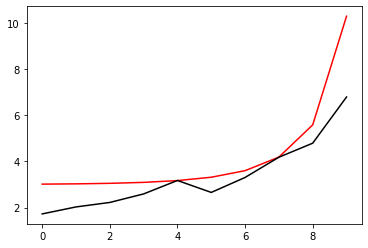

4422 5.142525540992031 -0.7619022306894161 0.7652082474277412
[1.72209089 2.02329553 2.22503923 2.59862286 3.1816993  2.68218155
 3.33293178 4.21603517 4.8281049  6.81726333]


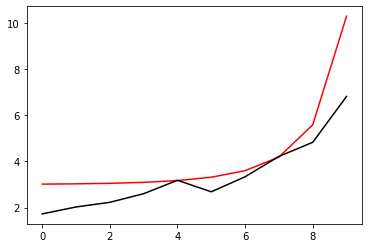

4623 2.2604781993221748 -0.7630174825634134 0.7661875098035565
[1.72139342 2.02104167 2.22866494 2.60604038 3.18771869 2.70605024
 3.35787355 4.24586244 4.86171837 6.83792284]


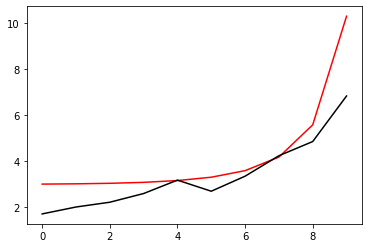

4824 2.054987406022482 -0.7640219698739595 0.7670834744007511
[1.72079616 2.01877919 2.23173739 2.6124205  3.19231339 2.72777292
 3.3802933  4.27311074 4.89302675 6.85716595]


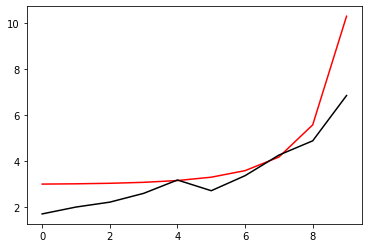

In [138]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 5001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 2.3397783380617114 -0.7657352545187406 0.7686538765669239
[1.71962333 2.01453509 2.23591747 2.62170719 3.19789609 2.76409745
 3.41864815 4.32396787 4.95809364 6.89715904]


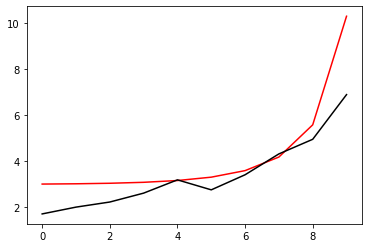

402 5.078779450320447 -0.7666954586836603 0.76947330065667
[1.71898661 2.0120911  2.23775433 2.6260101  3.19980963 2.78282214
 3.4383025  4.3512339  4.99516303 6.91995588]


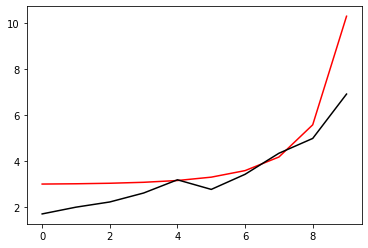

603 2.1878092783391234 -0.7676394145836906 0.7702894408765557
[1.71831745 2.00955568 2.23936434 2.62993807 3.20119419 2.80077484
 3.45685854 4.37700281 5.03048947 6.94152189]


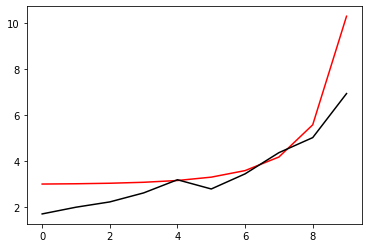

804 2.0531172430686384 -0.7686290342946188 0.7710325263623636
[1.71772231 2.00709607 2.2409165  2.6337081  3.20239634 2.81829266
 3.474856   4.4020167  5.06501462 6.96270927]


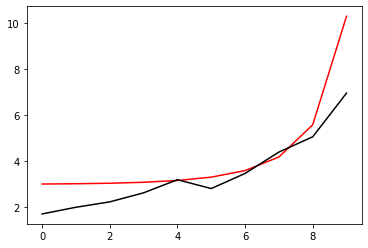

1005 3.0466965950984153 -0.7696695745844067 0.7717912733922362
[1.71696288 2.00450428 2.2422466  2.63722026 3.20340982 2.83549445
 3.49259346 4.42679089 5.099463   6.98392397]


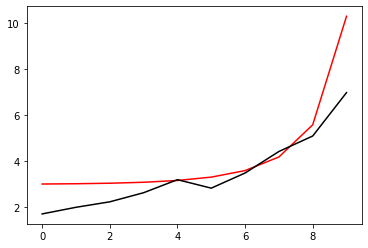

1206 3.0961527038023386 -0.7708186650774982 0.7726210044957814
[1.71581639 2.00159805 2.24323053 2.6404356  3.20432054 2.85262908
 3.51055996 4.45210851 5.13490847 7.0057889 ]


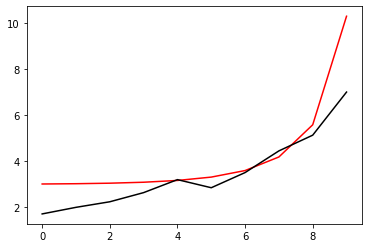

1407 3.9047194495970934 -0.7722890541335414 0.7735759657618819
[1.71379808 1.99796358 2.24355831 2.64320084 3.20521019 2.87008724
 3.52961021 4.47940581 5.173377   7.02950971]


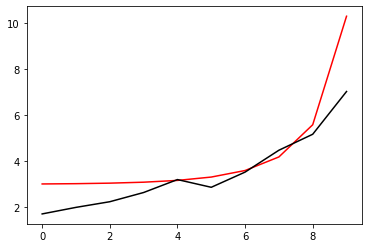

1608 2.0265636863338488 -0.7747912424807673 0.7750021468581403
[1.70882518 1.99172197 2.24166012 2.64444548 3.20579018 2.88862261
 3.55210049 4.51307994 5.2213536  7.05902013]


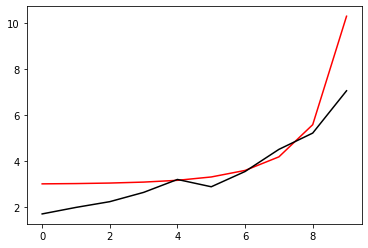

1809 5.148933827419898 -0.7860412207054569 0.7810245413348201
[1.67643515 1.95925112 2.21538705 2.62508332 3.19246797 2.90247484
 3.58506546 4.57649822 5.31734032 7.11799664]


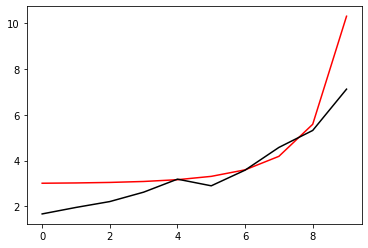

2010 6.113258838247262 -0.788231222721266 0.7836813648798652
[1.67272988 1.95738213 2.22129686 2.63932216 3.21402608 2.94982251
 3.64896339 4.66204933 5.42024671 7.18141129]


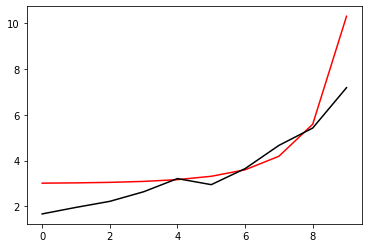

2211 2.0843534572339304 -0.7901983780197976 0.7856363949620631
[1.67072312 1.95647822 2.22752805 2.65278109 3.23297261 2.99210511
 3.70322131 4.7315597  5.50110297 7.23120441]


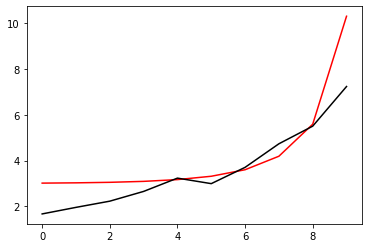

2412 4.10581784791954 -0.7920603945096535 0.7877437767496027
[1.66860509 1.9552037  2.23335565 2.66564811 3.25086005 3.03310454
 3.75491311 4.79655708 5.57555212 7.27702108]


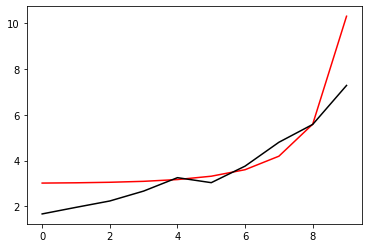

2613 1.8576612031107058 -0.7947370273974985 0.7907410124939153
[1.66304314 1.95126652 2.23731604 2.67786549 3.26998161 3.0776148
 3.8132755  4.87077865 5.66034461 7.32911889]


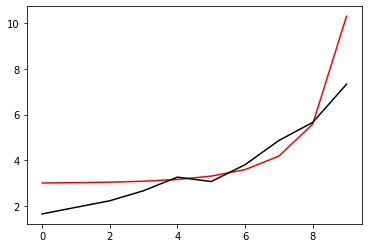

2814 2.999256837710671 -0.7969500381394071 0.7928101164360581
[1.66063788 1.95050442 2.24337838 2.69156463 3.29095656 3.12314388
 3.87495884 4.9504376  5.75081649 7.38483444]


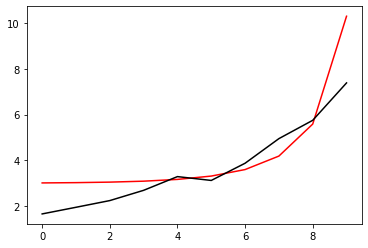

3015 3.0420975834134536 -0.796805326914098 0.7935675758863283
[1.66608097 1.95728986 2.25602275 2.71069551 3.31612189 3.1699034
 3.93565704 5.0265479  5.83522525 7.43678043]


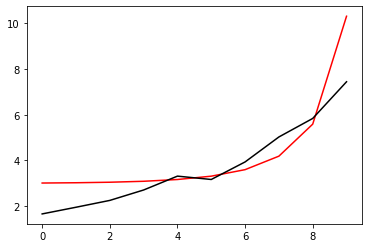

3216 2.134971532498305 -0.7965624763486655 0.7944317423731235
[1.6723079  1.96479531 2.26920446 2.7303258  3.34212834 3.21739466
 3.99826325 5.10622985 5.9247467  7.49192385]


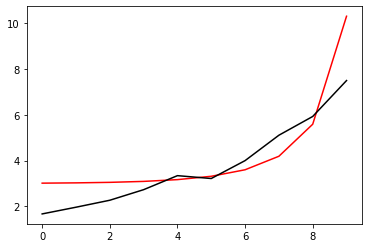

3417 2.2101787308512337 -0.7978490194769593 0.7958560998337078
[1.67315812 1.96586367 2.27474324 2.74094022 3.35748908 3.25263535
 4.04678    5.17087323 5.99967757 7.53808273]


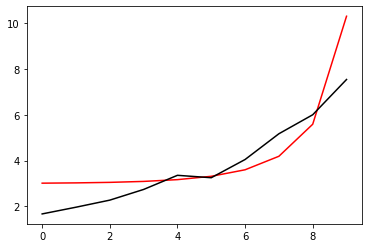

3618 1.150302917237443 -0.7991058488140093 0.7970527537454931
[1.6742198  1.96641006 2.27896569 2.74918719 3.36899128 3.28251209
 4.08742396 5.22516693 6.06281567 7.5769692 ]


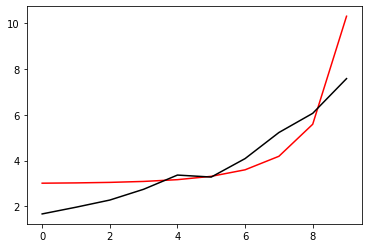

3819 5.05411391130452 -0.8002660699079815 0.7981510189647733
[1.67556709 1.96668223 2.28240363 2.75595227 3.37796354 3.30914066
 4.12312341 5.27282665 6.11829234 7.61115364]


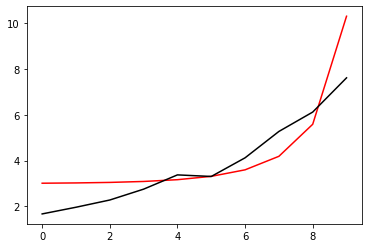

4020 5.5914589247925415 -0.8013896476488199 0.7991875390222345
[1.67715369 1.9667333  2.28527313 2.76166219 3.38510751 3.33372328
 4.15560984 5.31609996 6.16863856 7.6421326 ]


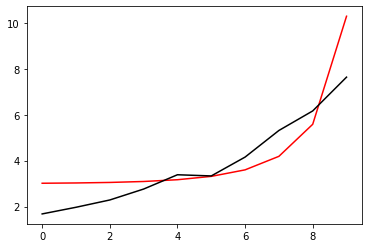

4221 2.0588096569484007 -0.8024872456538613 0.8001692716077308
[1.67903483 1.96668498 2.28779403 2.76665751 3.39091412 3.3570298
 4.18591624 5.35625503 6.21524587 7.67080715]


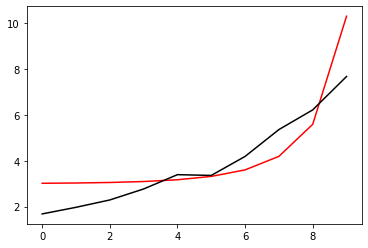

4422 4.0338586962957335 -0.8035549696766237 0.8011383842845786
[1.68116692 1.96653804 2.29002945 2.77107933 3.39562338 3.37949431
 4.21465319 5.39406725 6.25899836 7.69773308]


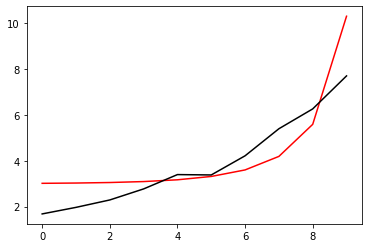

4623 1.0601479381752956 -0.8045994356071173 0.8021019283723437
[1.68355478 1.96633149 2.29205961 2.7750578  3.39942793 3.40143178
 4.24223346 5.43003898 6.30047327 7.72326123]


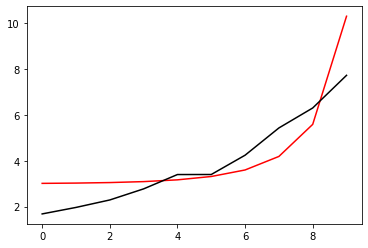

4824 2.124112269411587 -0.805579372193346 0.8030920844097149
[1.68623329 1.96612769 2.29397384 2.77871453 3.40249108 3.42308165
 4.26895066 5.46451783 6.34008242 7.74762424]


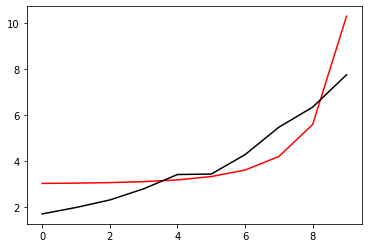

5025 3.0442058815000537 -0.8065624966815652 0.8040783353646016
[1.68913867 1.96587973 2.29573616 2.78202722 3.40481119 3.44448602
 4.29487914 5.49764021 6.37805342 7.77099663]


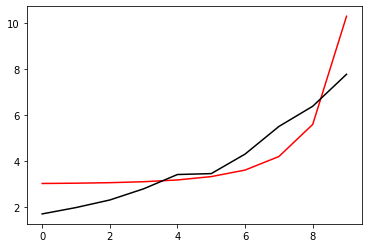

5226 2.0460230258797445 -0.8075531850535413 0.8050705265458588
[1.69224811 1.96558221 2.29734831 2.78500899 3.40642538 3.46570916
 4.32011937 5.52957231 6.41464062 7.79353163]


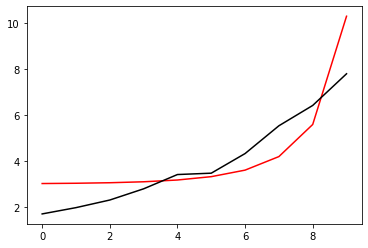

5427 2.0610111107821876 -0.8085744617384202 0.8060688344855556
[1.69553191 1.96522008 2.29879591 2.78765413 3.40735944 3.48679417
 4.34477412 5.5605082  6.45013711 7.81539866]


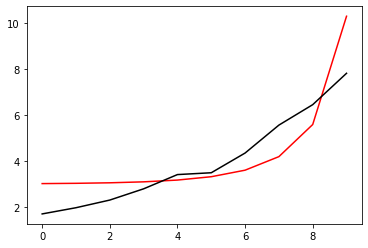

5628 1.0512180084638763 -0.8096588827920255 0.807087891839256
[1.69892105 1.96473904 2.30002062 2.78991541 3.40761697 3.5077586
 4.36897183 5.59071635 6.48493114 7.83683734]


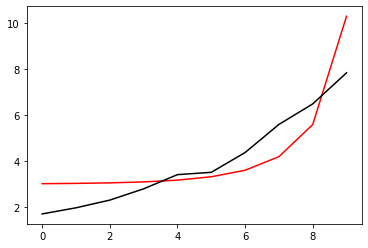

5829 5.044624386926028 -0.8108533310285034 0.8081849674666972
[1.7022651  1.96400684 2.30088455 2.79168329 3.4071963  3.52863927
 4.39300023 5.62074671 6.51974002 7.85828737]


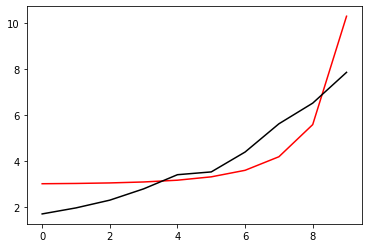

6030 5.158441542517786 -0.8123304542866129 0.8094775630391055
[1.70516933 1.96266831 2.3010417  2.79271366 3.40615092 3.54965605
 4.41778274 5.6521748  6.55645138 7.8808657 ]


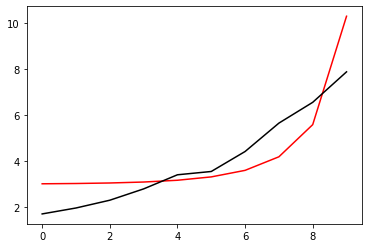

6231 2.053283841459151 -0.8145676340830613 0.8113314300492706
[1.70662396 1.95988468 2.29974736 2.79265319 3.40511853 3.57201853
 4.44689725 5.69073264 6.60162575 7.90868354]


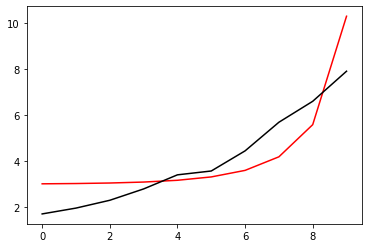

6432 2.2060665437011884 -0.8227290500932684 0.8151013462504725
[1.69426076 1.94417915 2.28580808 2.78115804 3.39590739 3.58804947
 4.47982    5.74565391 6.6697905  7.9506368 ]


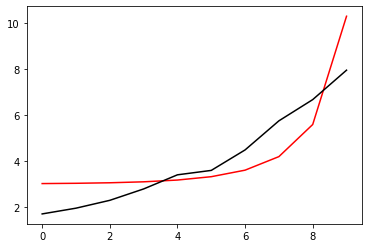

6633 1.609783444334348 -0.8274092135395453 0.8185890493990569
[1.68499943 1.93515269 2.280667   2.78008922 3.39846331 3.61144589
 4.51710198 5.79988466 6.73190606 7.98875775]


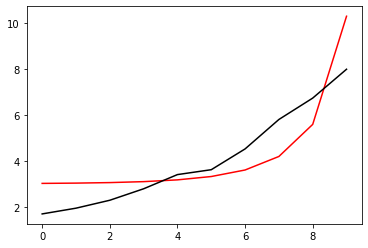

6834 3.018316390252632 -0.8284681160918602 0.8198200728169461
[1.68654511 1.93688858 2.28581127 2.78873875 3.41013048 3.64020083
 4.55607419 5.85165479 6.79025433 8.0246219 ]


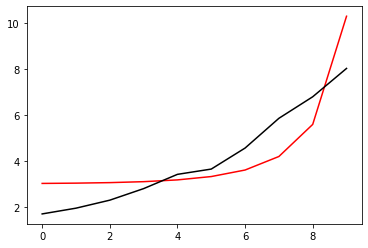

7035 3.048168493224324 -0.829519962977332 0.8210428619906228
[1.68795246 1.93836045 2.29028049 2.79623059 3.42011569 3.6651311
 4.58949938 5.89683906 6.84336565 8.05729341]


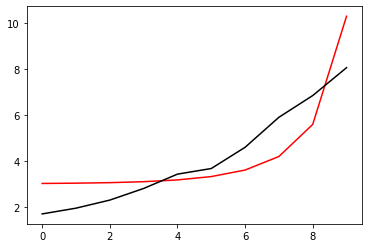

7236 2.0476741138687236 -0.8305569297993883 0.8222524035763815
[1.68931814 1.93959587 2.29413817 2.80268527 3.42859334 3.68710389
 4.61868273 5.93673572 6.89175109 8.0870819 ]


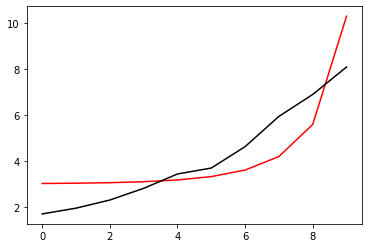

7437 2.038533544090699 -0.8315974700974673 0.8233901999878139
[1.69074523 1.94068806 2.29754261 2.80834384 3.43589475 3.70695125
 4.64481668 5.97274146 6.93648026 8.11463272]


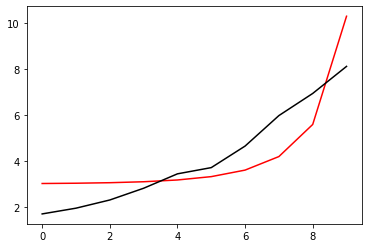

7638 1.0512468054961863 -0.8326331992894797 0.8245266640567044
[1.69223607 1.94165423 2.3005757  2.81336735 3.44227228 3.7252803
 4.66879472 6.00600014 6.97862911 8.14060697]


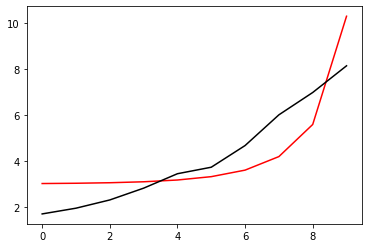

7839 4.078027892583628 -0.833803705533723 0.8255998476411319
[1.69367955 1.94241034 2.30321559 2.81781315 3.44788439 3.74253314
 4.69133565 6.03752973 7.01930826 8.16565347]


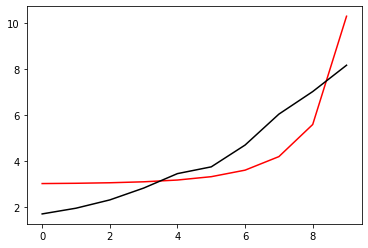

8040 5.052930303223748 -0.8350685703182408 0.8267729278618555
[1.69506669 1.94298432 2.30555034 2.82184929 3.45300946 3.75921838
 4.7132158  6.0684037  7.05972195 8.19054767]


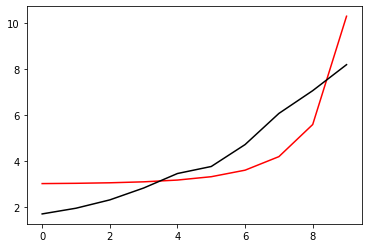

8241 2.0593918669581517 -0.8367557665362181 0.8282399074898423
[1.69581461 1.94290753 2.30724906 2.82533353 3.45778261 3.77587886
 4.73561319 6.10058135 7.10236948 8.21682582]


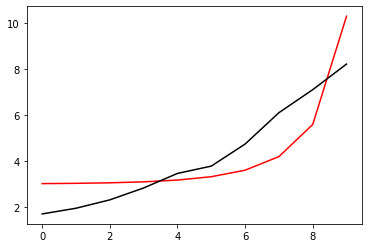

8442 2.1820670208796082 -0.8447324657573989 0.8344085957552123
[1.68327369 1.93035227 2.2975209  2.81903549 3.45545442 3.78956479
 4.76217837 6.14675384 7.16720864 8.25646532]


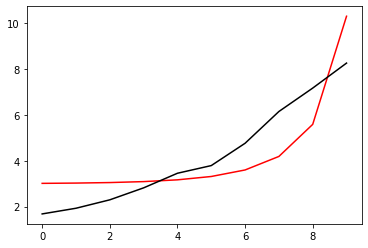

8643 1.458932165009455 -0.8473482233895578 0.8371827382420675
[1.68749762 1.93206828 2.30021307 2.82500545 3.46789113 3.8230819
 4.82138289 6.23914399 7.27842    8.32488244]


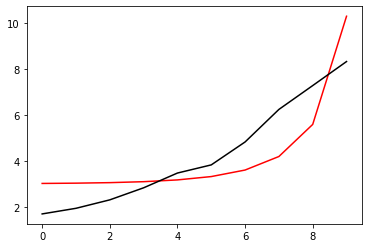

8844 2.4016575292540745 -0.8489714042700093 0.8388600995524407
[1.69142662 1.93407928 2.30308647 2.83070113 3.47928914 3.85359078
 4.87605987 6.32127903 7.36979992 8.38110666]


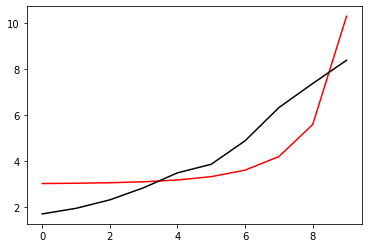

9045 3.0997098242873453 -0.8501746995486587 0.8402530667389887
[1.69500439 1.93587762 2.30553837 2.83553122 3.48907176 3.88089234
 4.92547424 6.39337776 7.44680906 8.42852739]


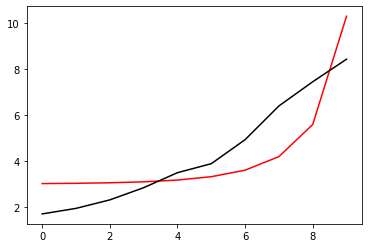

9246 2.0371596772342615 -0.8511640192047972 0.8414928789386139
[1.6982674  1.93754152 2.30783902 2.84006475 3.49825043 3.90680018
 4.97217417 6.45945036 7.51559983 8.4709042 ]


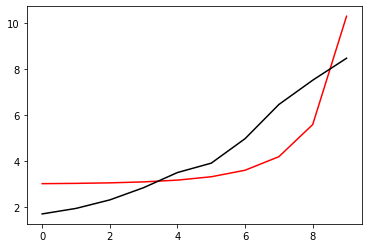

9447 2.140117928432398 -0.8520111162544579 0.8426849183373362
[1.70124101 1.93910979 2.31011681 2.84458018 3.50733653 3.93218225
 5.01729754 6.52154246 7.57941412 8.51024229]


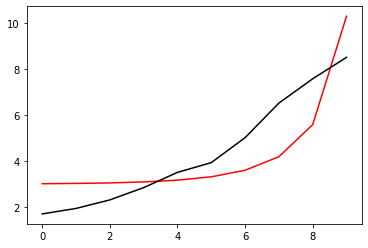

9648 1.1044187251591893 -0.8527982122407418 0.8438408648479617
[1.70396513 1.94054962 2.31230519 2.8490021  3.51626755 3.95698037
 5.06072819 6.58021272 7.63962289 8.54737418]


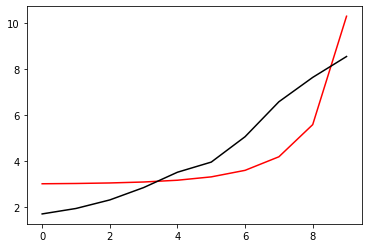

9849 1.6140016847545156 -0.8536964445129207 0.844855427901797
[1.70642774 1.94171388 2.31414174 2.85295977 3.52455975 3.9806046
 5.10187261 6.63548781 7.69673601 8.58254206]


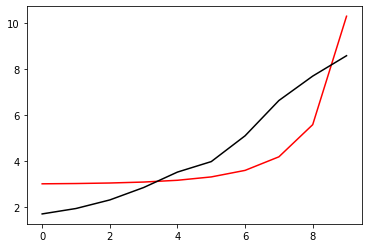

In [139]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 2.231842979564891 -0.8552991643630503 0.8463951194147761
[1.71074711 1.94353535 2.31664001 2.85847875 3.53671236 4.01814652
 5.16876736 6.72689774 7.79241493 8.64121381]


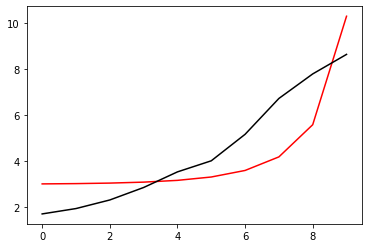

402 2.0594566904454514 -0.8561216380712473 0.8471467727399469
[1.7133565  1.94441879 2.31758811 2.86086101 3.54265531 4.03864133
 5.20584698 6.77741534 7.84541488 8.67390302]


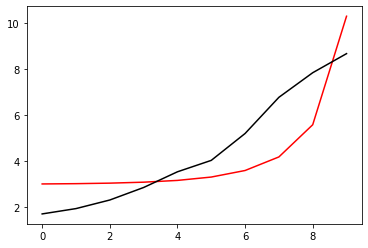

603 0.5031089067984744 -0.8569162331771637 0.8478547574408389
[1.7161772  1.94528731 2.31824126 2.86264081 3.54765336 4.05781614
 5.24161235 6.8272416  7.89799535 8.70624555]


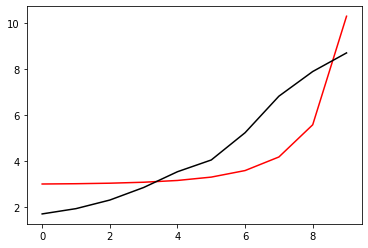

804 2.220893731407709 -0.8576233525007444 0.848580676574014
[1.71919866 1.94615661 2.31863764 2.86387812 3.5517903  4.07576047
 5.27623297 6.87670898 7.95046693 8.73854194]


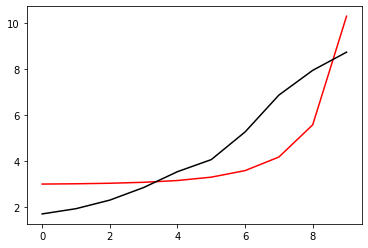

1005 2.916083275107307 -0.858252107451368 0.8493249835709114
[1.72239073 1.94703838 2.31883343 2.86468113 3.5552414  4.09269925
 5.30998285 6.92619231 8.00322824 8.77102141]


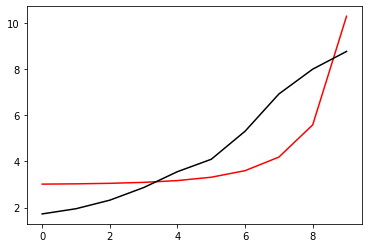

1206 1.80919940448403 -0.8588343410380131 0.8500710701034796
[1.72570728 1.94792868 2.31887148 2.86514807 3.55817651 4.10886109
 5.34310932 6.97596699 8.05658994 8.80385722]


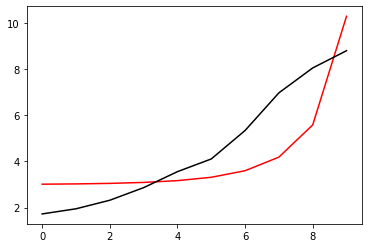

1407 2.159360175893675 -0.8593399522107141 0.850847487244246
[1.72914271 1.94886025 2.31882676 2.86540154 3.56077587 4.12446782
 5.37579346 7.02612138 8.11065477 8.83716028]


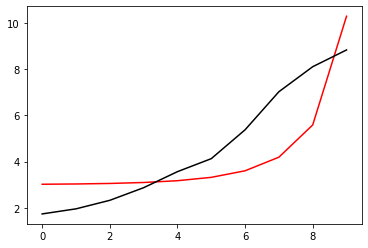

1608 1.1182229313099847 -0.8598032385639697 0.8516308455911431
[1.73266088 1.94983015 2.31873469 2.86552188 3.56317671 4.13971532
 5.40822178 7.0767315  8.16550477 8.87097   ]


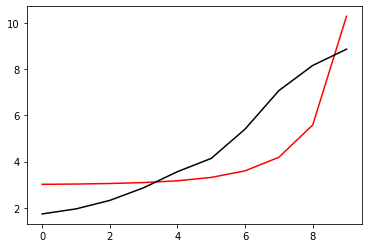

1809 1.3186860114483094 -0.8603419049076819 0.8523504021791046
[1.73613918 1.95074023 2.31852763 2.86547855 3.56539773 4.15468766
 5.44050398 7.12782989 8.2211972  8.90525913]


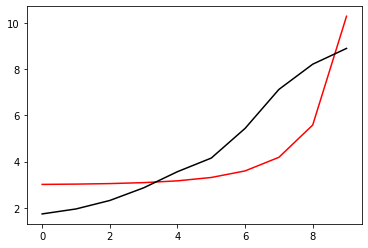

2010 4.856223273848392 -0.8609242149203823 0.8530207331357583
[1.73961113 1.9516515  2.31829665 2.86539352 3.56759302 4.16957088
 5.47277583 7.17933275 8.27757914 8.93995353]


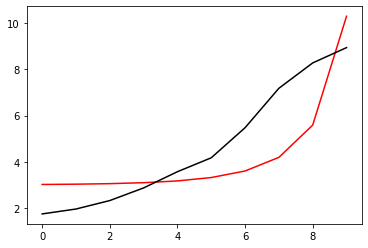

2211 2.2488901634508833 -0.8615822823907257 0.8535579485637389
[1.74322129 1.95272638 2.31822497 2.86547176 3.56999025 4.18461909
 5.50524384 7.23120992 8.33450234 8.97494892]


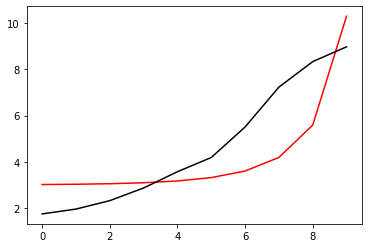

2412 2.037141333471938 -0.8622303037376308 0.8540975847365233
[1.7467971  1.95381388 2.31818342 2.86560204 3.57248923 4.19974467
 5.53778419 7.28322164 8.39171267 9.01013587]


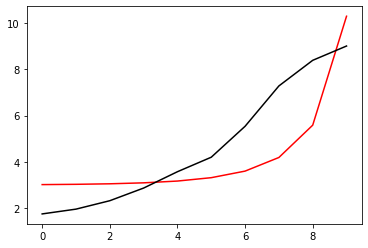

2613 0.2653147640586814 -0.8628719752731551 0.8546449958152393
[1.75029657 1.95488791 2.31816359 2.86579208 3.57511075 4.21499092
 5.5704269  7.33528691 8.44906537 9.04541699]


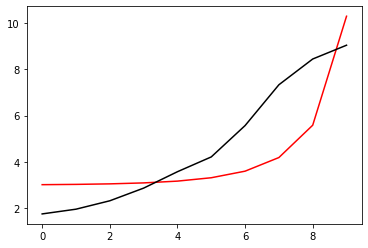

2814 2.1787878549456527 -0.8634443440203665 0.8552419941384338
[1.75375045 1.95599763 2.31823366 2.86612609 3.57794974 4.23046885
 5.60325461 7.38735407 8.5064108  9.08072942]


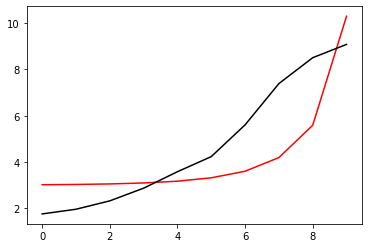

3015 2.5310977331727424 -0.8639657354378392 0.8558817781939075
[1.75712039 1.9571225  2.31839442 2.86662816 3.58105806 4.24628622
 5.63643327 7.4395637  8.56381814 9.11605872]


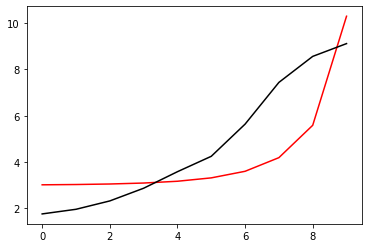

3216 1.3999575342745427 -0.8644627412429936 0.8565439574932616
[1.76038253 1.95826136 2.31867095 2.86735184 3.58452315 4.26259406
 5.67017608 7.49209265 8.62137927 9.15146297]


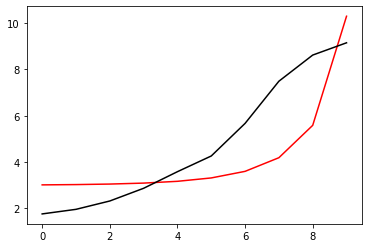

3417 2.141931479511631 -0.8649016162505279 0.8572538622121315
[1.76354843 1.95945439 2.31913621 2.86840625 3.5884986  4.2796242
 5.7047851  7.54517992 8.67922492 9.18708882]


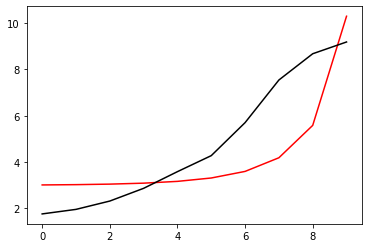

3618 1.1123669148388815 -0.8653181657251275 0.8579899677302263
[1.76659127 1.96071319 2.31984895 2.8699094  3.59318756 4.29773211
 5.74080265 7.59937467 8.73779163 9.22318898]


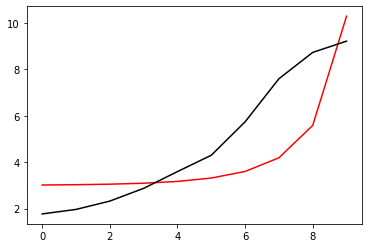

3819 1.2241802755824815 -0.8658217059129164 0.8586913798482482
[1.76940975 1.96199029 2.32082991 2.87197251 3.59883875 4.3174083
 5.77903742 7.65556495 8.79786035 9.26018414]


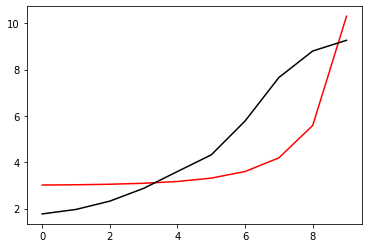

4020 4.612174076577622 -0.8664095227599511 0.8593511918698076
[1.77206424 1.9634455  2.32235862 2.87503005 3.60611592 4.3396803
 5.82095435 7.7152372  8.86070274 9.29881169]


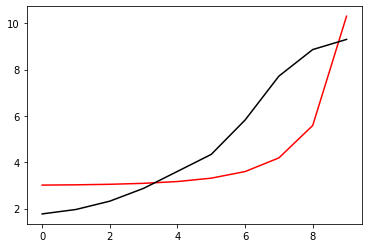

4221 2.1587478784380427 -0.8670524228144094 0.859960088877463
[1.77474487 1.96542261 2.32496245 2.87984935 3.61614277 4.3661861
 5.86880545 7.78077846 8.92850349 9.34047213]


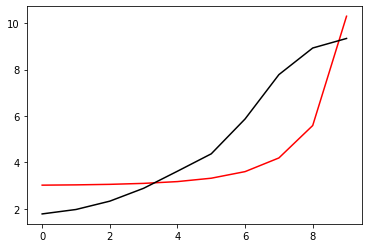

4422 2.044538290010348 -0.8676877967314518 0.860628724364401
[1.77747937 1.96817597 2.32915864 2.8872868  3.63026211 4.39882049
 5.92524551 7.85568047 9.00503578 9.3875458 ]


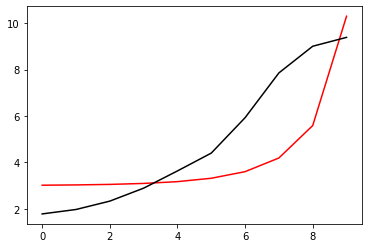

4623 0.2954686520291516 -0.8685631166103044 0.8614642007591544
[1.7792167  1.97053471 2.33360216 2.89572382 3.64634602 4.4341768
 5.98531044 7.93593881 9.08831457 9.43880496]


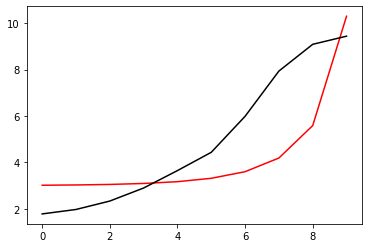

4824 1.439411515534815 -0.8694704460573306 0.8625327776908027
[1.77987506 1.97188125 2.33698919 2.90287354 3.66052036 4.46572653
 6.03865959 8.00898218 9.16645956 9.48687092]


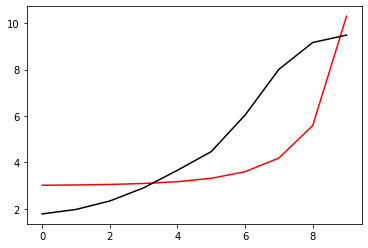

5025 2.181683534065265 -0.8703422957400339 0.8635453909726972
[1.78031275 1.97285498 2.33972765 2.90887182 3.67258487 4.49309184
 6.08458077 8.0727881  9.23627219 9.52983411]


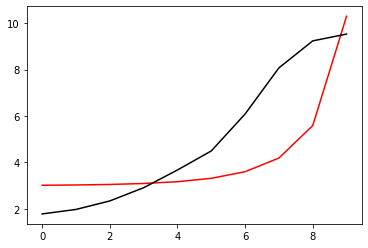

5226 1.1349046863850014 -0.8711331122942617 0.864462929088036
[1.78087042 1.97374865 2.34210142 2.91405164 3.68304248 4.5173523
 6.12498935 8.12940378 9.29915328 9.56856158]


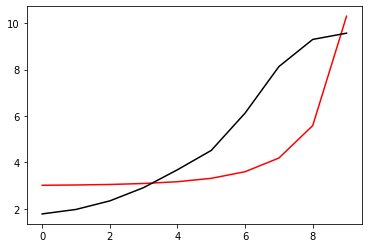

5427 1.9651055831076027 -0.8718118629750597 0.8653150186709151
[1.78167767 1.9746766  2.344243   2.91861473 3.69226418 4.53933504
 6.16138743 8.18069407 9.35673506 9.60403366]


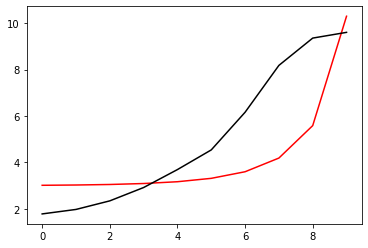

5628 1.103164550488576 -0.8723928499131871 0.8661094982736509
[1.78275246 1.97564933 2.34617803 2.92263706 3.70044337 4.55953268
 6.1947204  8.22793511 9.41024658 9.63701395]


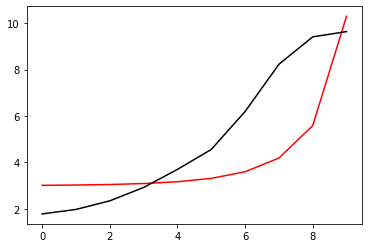

5829 1.2068665861204741 -0.8729547389537132 0.8668008786588758
[1.7840223  1.97660058 2.34786226 2.92612323 3.70768418 4.57827221
 6.22566507 8.27211452 9.46071793 9.66809453]


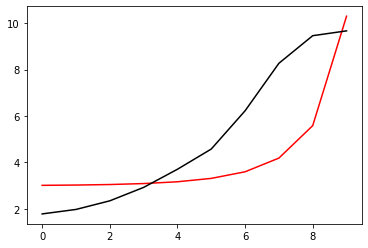

6030 3.9787555871151756 -0.8735329509099317 0.8673578230645166
[1.78548981 1.97755632 2.34935432 2.92918374 3.71418576 4.59591324
 6.25482814 8.31405481 9.50900616 9.69777696]


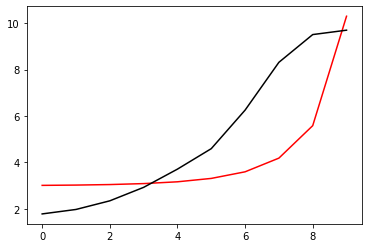

6231 2.130405454561989 -0.8740850040009405 0.8678215219173708
[1.78721233 1.97860227 2.3507726  2.9319825  3.72018241 4.61278979
 6.28269535 8.35436955 9.55575692 9.726514  ]


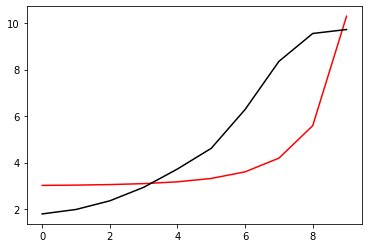

6432 2.030527057693937 -0.8746179936244175 0.8682397239495171
[1.78905603 1.9796534  2.35208237 2.93454603 3.72578578 4.62911602
 6.30964881 8.39360828 9.6016017  9.75470302]


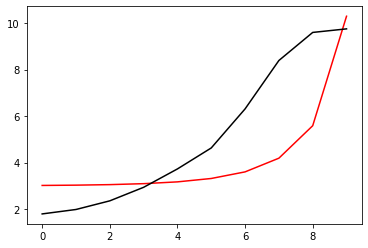

6633 0.2225564209338546 -0.875153276296886 0.8686263383837886
[1.79092121 1.98065899 2.35328222 2.93693149 3.73113191 4.64510662
 6.3360385  8.43224903 9.64709033 9.78267621]


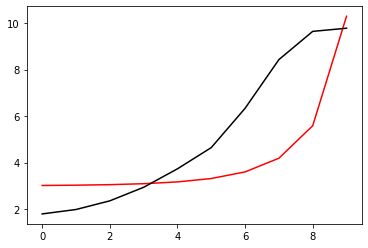

6834 1.1651647440205042 -0.8756157970912383 0.8690566108423818
[1.79284388 1.98170972 2.35451425 2.93933615 3.73648394 4.66106519
 6.36223304 8.47068186 9.69262027 9.81070545]


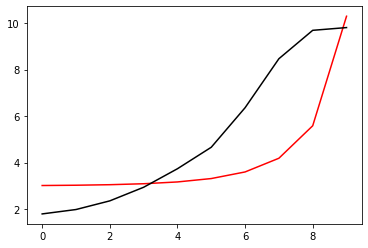

7035 2.1531478484876634 -0.8760298044506805 0.869521363994142
[1.79475437 1.98279556 2.35582354 2.94186228 3.74201016 4.67720284
 6.3885324  8.50926914 9.73857595 9.83902729]


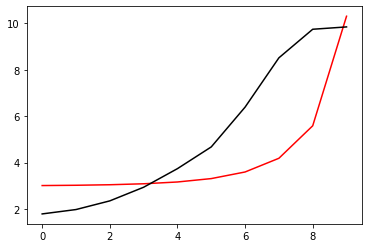

7236 1.12472039296231 -0.8764143319448585 0.8700107557954577
[1.79659229 1.98393035 2.35729118 2.94465744 3.7479309  4.69379198
 6.4153254  8.5484801  9.78541395 9.86790852]


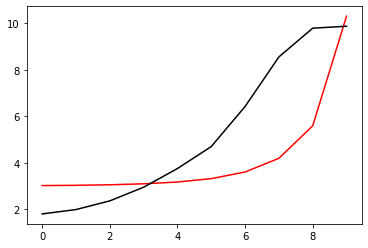

7437 1.5481534526744454 -0.8767369094008561 0.870554830706553
[1.79834891 1.98521448 2.35911761 2.94802111 3.75465565 4.71134718
 6.4433435  8.58920402 9.83395658 9.89776775]


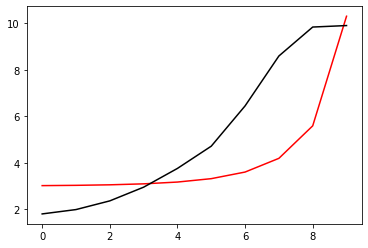

7638 1.1126648137932393 -0.8770465393100134 0.8711230893982747
[1.79988134 1.9866628  2.3614588  2.95224326 3.76261613 4.73043971
 6.47347614 8.63264612 9.88537029 9.92941444]


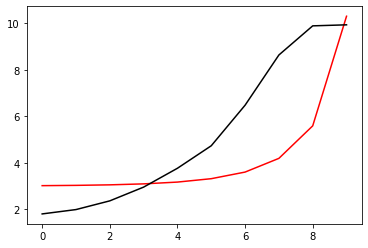

7839 1.213200373612813 -0.8774117181164198 0.8716500562809342
[1.80105408 1.98843184 2.36473949 2.95801399 3.77280056 4.7523906
 6.50774982 8.68159521 9.94243461 9.96453903]


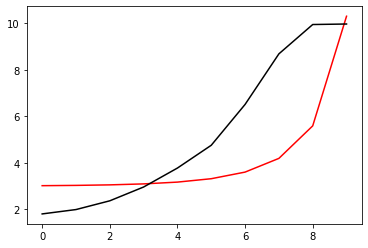

8040 3.9476415688362225 -0.8778122041352713 0.8719636520393497
[ 1.80224052  1.99142253  2.37034487  2.96720342  3.78763099  4.78021795
  6.5504917   8.74206253 10.01144876 10.00703107]


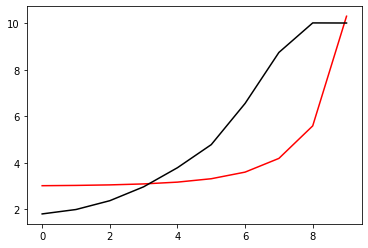

8241 1.423658291820377 -0.8780650130942272 0.8722799593081286
[ 1.80353059  1.99574277  2.37837501  2.97989431  3.80715632  4.81373583
  6.60183344  8.81601526 10.09654912 10.05936463]


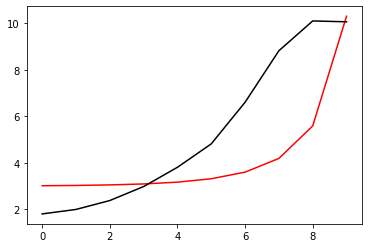

8442 1.7496677587897844 -0.8788183881291213 0.8731946366533285
[ 1.80214085  1.99718663  2.38323272  2.9889802   3.82238246  4.84142218
  6.64594451  8.88303387 10.17728121 10.1089781 ]


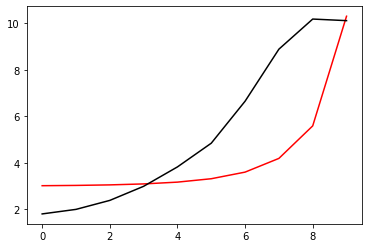

8643 0.48863958844141153 -0.8796718325748717 0.8739489610250136
[ 1.80075437  1.99827321  2.3873137   2.99674807  3.83548565  4.86545193
  6.68425684  8.94208995 10.24997366 10.15362478]


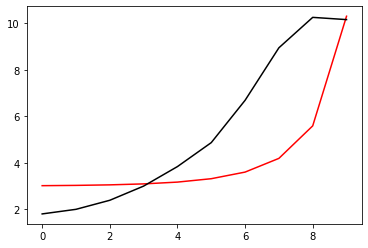

8844 1.1307373340747904 -0.8804118352321549 0.8746120208991589
[ 1.79981121  1.99943746  2.39108845  3.00375189  3.84718257  4.88691184
  6.71823818  8.99469249 10.31571908 10.19403976]


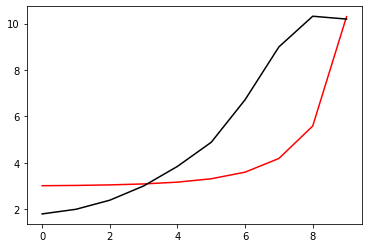

9045 2.1366909833160004 -0.8810432284391213 0.8751990991257318
[ 1.79931526  2.00064578  2.39451407  3.00997157  3.85752553  4.90605495
  6.74839775  9.04155736 10.37517862 10.23062991]


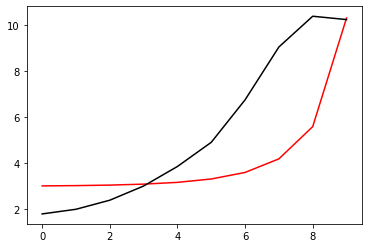

9246 1.1369937255106755 -0.8815698018880642 0.8757416812047465
[ 1.7992386   2.00184524  2.39753072  3.01536253  3.8665211   4.92303713
  6.77511539  9.08332832 10.4289959  10.26378845]


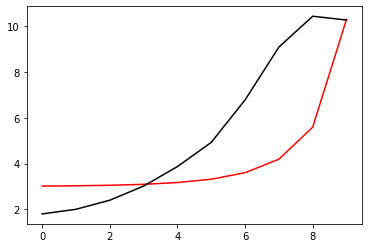

9447 1.1744552886673782 -0.8819786884753791 0.8762893947295021
[ 1.79954192  2.00301004  2.40013434  3.01995772  3.87426964  4.93811396
  6.79889796  9.12084503 10.47805523 10.29404883]


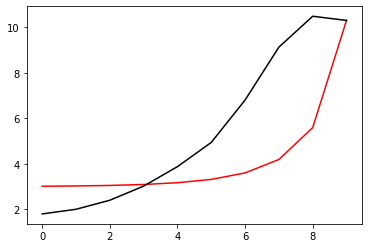

9648 1.1282450674653415 -0.8823058079160808 0.8768299937820312
[ 1.80014605  2.0041171   2.40235633  3.02385128  3.88095286  4.95162829
  6.82035369  9.15507281 10.52341524 10.32205621]


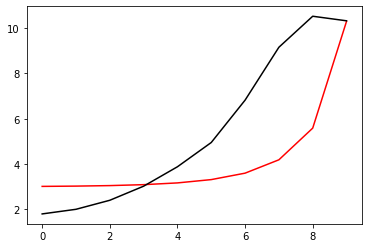

9849 1.2584676564984736 -0.8826201139627169 0.8773287932348958
[ 1.80092421  2.00511903  2.40422096  3.0271427   3.88676493  4.96392303
  6.84007653  9.18694342 10.56614378 10.34842716]


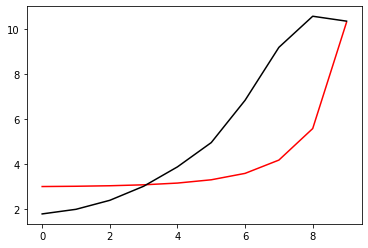

In [140]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 1.1691368105228834 -0.8833926480243761 0.8779699773588304
[ 1.80226654  2.00633267  2.40610665  3.03043462  3.89287682  4.97813601
  6.8642515   9.23019411 10.62607973 10.38517347]


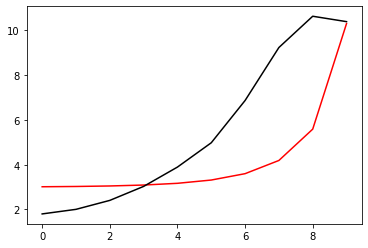

402 1.2024858097410662 -0.8835435176813642 0.878188804687063
[ 1.80287985  2.00710286  2.40748398  3.03286032  3.89723164  4.98770257
  6.88032142  9.25775596 10.66362317 10.40827734]


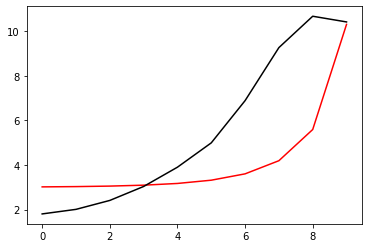

603 0.45771323941025177 -0.8838327843932654 0.8783579945729928
[ 1.80368018  2.00789819  2.40880048  3.0351923   3.90153339  4.99746641
  6.89646596  9.2846981  10.70061426 10.43099253]


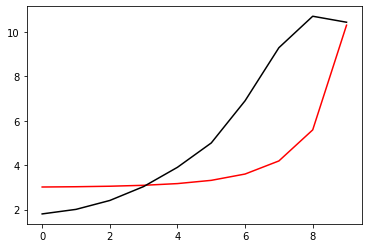

804 1.152295711911305 -0.8841346066140804 0.8785451616567339
[ 1.80465956  2.00868287  2.40995688  3.03723478  3.90542142  5.00665742
  6.91158418  9.30987689 10.73591668 10.45269126]


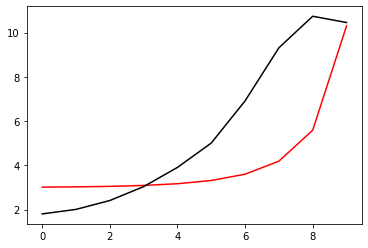

1005 2.1625419389819314 -0.8844221284101208 0.8787530979623683
[ 1.80581236  2.00942307  2.41087536  3.0388525   3.90867324  5.01486756
  6.92513848  9.3327458  10.76894372 10.47302279]


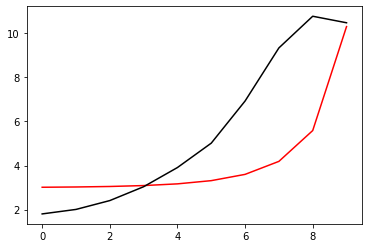

1206 1.1631884163978756 -0.8846655766802514 0.8789947077906334
[ 1.8071436   2.01010147  2.41150939  3.03996475  3.91116185  5.02189155
  6.93687748  9.35304997 10.79936562 10.4917847 ]


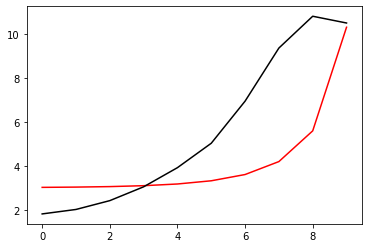

1407 1.1834603947293136 -0.8848336762736153 0.8792882175232737
[ 1.8086583   2.01071955  2.4118527   3.04055598  3.91286009  5.02769185
  6.94677808  9.37079584 10.82712284 10.50893643]


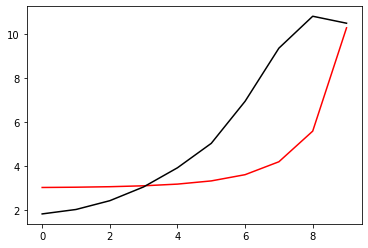

1608 1.1454597859295252 -0.8849496159595086 0.8796048120558179
[ 1.81033516  2.01127627  2.41191994  3.04065584  3.91381564  5.0323515
  6.9549861   9.38620346 10.85240532 10.52457799]


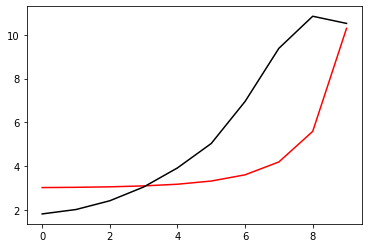

1809 1.2616035075647196 -0.885058240301074 0.879915839223047
[ 1.81210646  2.01173929  2.41170932  3.04029304  3.91409392  5.03599779
  6.96172468  9.39961197 10.87556854 10.53889705]


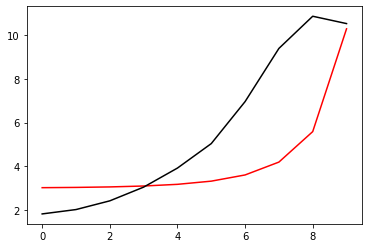

2010 3.4544261487103225 -0.8851806435089803 0.8801285678287566
[ 1.81408473  2.01226673  2.4114192   3.03970545  3.9139784   5.03898249
  6.96743778  9.41154904 10.89711258 10.55211346]


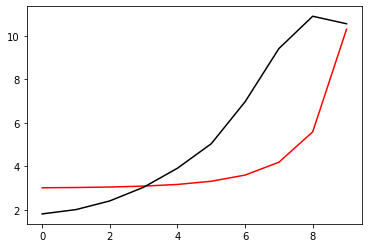

2211 1.1874052038773113 -0.8853408098769926 0.880250156031153
[ 1.81619152  2.01280527  2.41101762  3.03888126  3.9134799   5.04135258
  6.97222168  9.42217267 10.91721668 10.56445013]


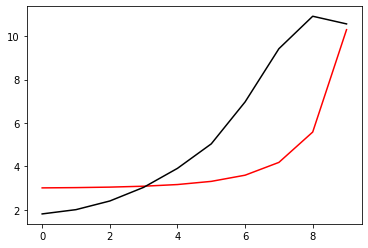

2412 1.139974506596005 -0.8855030506358833 0.8803539338255384
[ 1.81834174  2.01330828  2.41049234  3.03784162  3.91265737  5.0432223
  6.97626929  9.4317703  10.93620525 10.57609449]


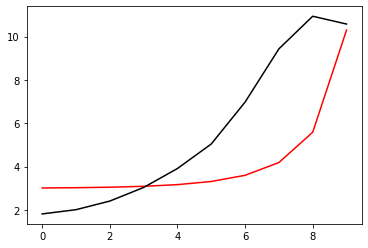

2613 0.4709102710600481 -0.8857794814230368 0.8803775572164609
[ 1.82041302  2.013677    2.40976738  3.03653486  3.91148981  5.04461987
  6.97968665  9.44055584 10.95435852 10.58719758]


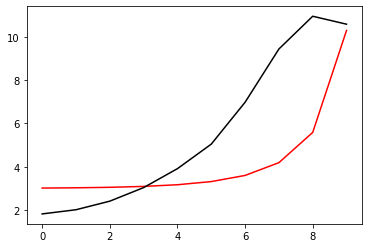

2814 1.1781317188803 -0.8860567139455936 0.8804464382191377
[ 1.82238306  2.01391337  2.4088654   3.03500216  3.91003708  5.04562928
  6.98258581  9.44866735 10.97181351 10.59789893]


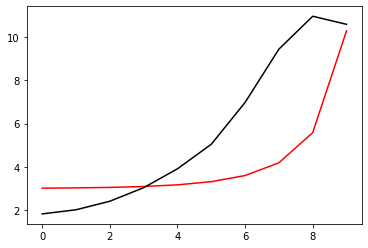

3015 2.183592016577046 -0.8862209340306889 0.8805703910113181
[ 1.82461747  2.01411002  2.40762514  3.03283266  3.90761041  5.04519403
  6.98337283  9.45390755 10.98615867 10.60673358]


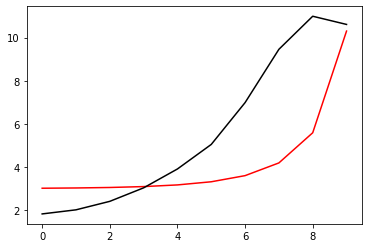

3216 1.1673312377519116 -0.8862778069757923 0.8807099253754503
[ 1.8269455   2.01453719  2.40671404  3.0310762   3.90567784  5.04532371
  6.98484747  9.45992713 11.00127895 10.61610343]


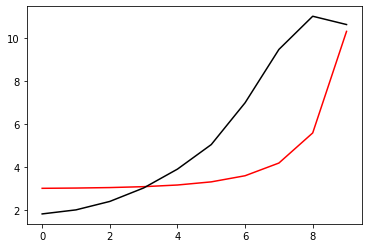

3417 1.1814514229753512 -0.8863491902749602 0.8809265489645746
[ 1.82899207  2.01479237  2.40571191  3.02930033  3.90379919  5.04557998
  6.98658409  9.46636505 11.01692206 10.62579562]


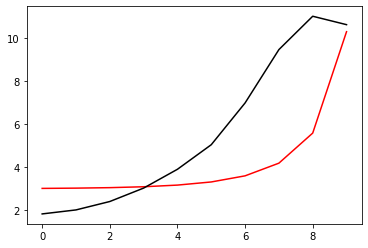

3618 1.145392834015714 -0.8863873418566348 0.8811558463652354
[ 1.83104791  2.01508851  2.40476431  3.02758732  3.90198869  5.04588907
  6.98836334  9.47280196 11.032535   10.63547756]


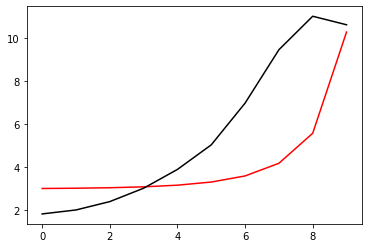

3819 1.2372260173858538 -0.8864285255404234 0.8813840593622425
[ 1.83308108  2.01536975  2.40379546  3.02584379  3.90013591  5.0461227
  6.9900328   9.47906796 11.04795616 10.64502043]


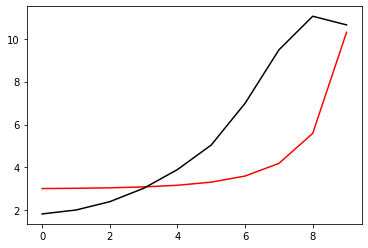

4020 3.419379917403864 -0.8865135777494175 0.8815079886983663
[ 1.83523303  2.01577625  2.40294572  3.02421155  3.89838581  5.04643154
  6.99174665  9.48530449 11.06328981 10.65439805]


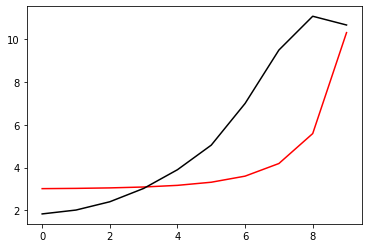

4221 1.190737186942156 -0.8866540217150249 0.881540125025993
[ 1.83745966  2.01625154  2.40214728  3.02261137  3.89664595  5.04670581
  6.99336888  9.4913514  11.07837699 10.66363117]


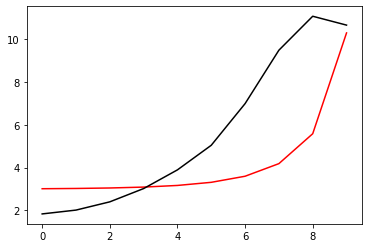

4422 1.1296769968360292 -0.8868004912539245 0.881568248514038
[ 1.83967378  2.01671854  2.40133265  3.02098517  3.89486872  5.04691265
  6.99489029  9.49723614 11.09327496 10.67274387]


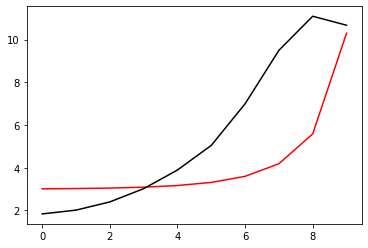

4623 0.39191674380820973 -0.8870378179267481 0.8815487708115769
[ 1.84178613  2.01708835  2.40041486  3.01924975  3.89297785  5.04698969
  6.99627675  9.50297486 11.10804618 10.68175976]


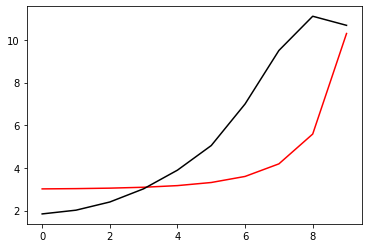

4824 1.193695399594977 -0.8872239998857798 0.8815757816993556
[ 1.84390126  2.01746618  2.39949851  3.01750722  3.89106982  5.04702119
  6.99758426  9.50856996 11.12263826 10.69070345]


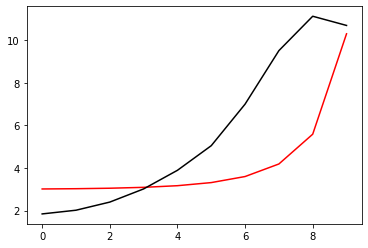

5025 2.2020745048874706 -0.8873575282163918 0.8816523479884592
[ 1.84601545  2.01784894  2.39858145  3.01575654  3.88914504  5.04701003
  6.99881925  9.51403263 11.13706446 10.69959041]


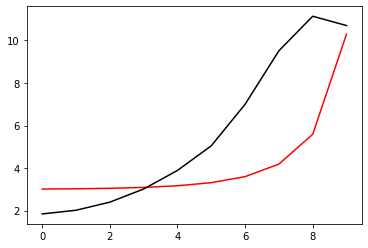

5226 1.186685339828009 -0.8874251703396324 0.8817913794421413
[ 1.84812884  2.01823805  2.39766655  3.01400223  3.88721     5.04696549
  6.99999481  9.51938011 11.15134251 10.70842724]


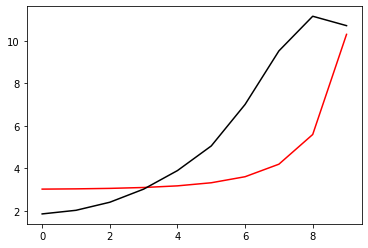

5427 1.1901375131556082 -0.8874219970114122 0.8819887226771171
[ 1.85026256  2.01865459  2.39677516  3.01226605  3.88528716  5.04691124
  7.00113554  9.52463566 11.16549012 10.71721395]


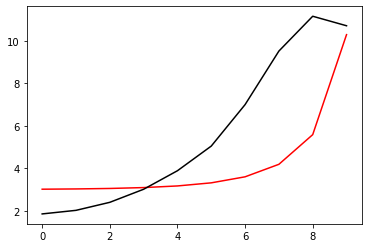

5628 1.146018070384213 -0.8873797540451961 0.8821932052222673
[ 1.85246304  2.01914325  2.39595079  3.01059078  3.88341898  5.04688971
  7.00228232  9.52983332 11.17952896 10.72593702]


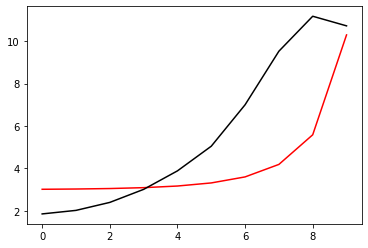

5829 1.2398006717116379 -0.8873005397271697 0.8823502830435733
[ 1.85486973  2.01980864  2.39526629  3.00901864  3.88161427  5.04686582
  7.00333287  9.53478379 11.1932165  10.73442207]


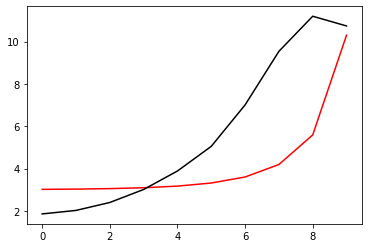

6030 3.363257401273109 -0.8873294058576907 0.8824725563033199
[ 1.85710202  2.02031554  2.39442807  3.0072972   3.8796679   5.04670184
  7.00426986  9.53965924 11.20688452 10.74278483]


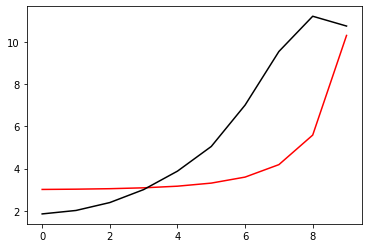

6231 1.1956063878034238 -0.8874201720340555 0.8825268537004192
[ 1.85932649  2.02085726  2.39365444  3.00566885  3.87784765  5.04669545
  7.00542158  9.54478905 11.22080738 10.75130718]


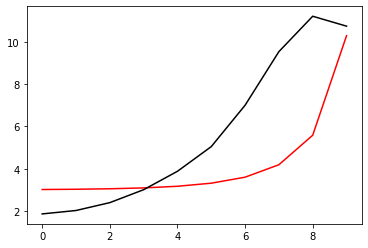

6432 1.1384643462001445 -0.887522585439592 0.8825733857213373
[ 1.86154368  2.02138968  2.39286069  3.00400948  3.87598598  5.04662263
  7.00648044  9.54977581 11.23456186 10.75972068]


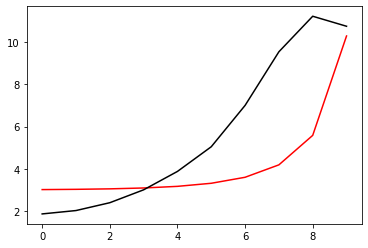

6633 0.4560257688126494 -0.8877873794804353 0.882589419751557
[ 1.86346397  2.02162005  2.39175174  3.00202296  3.87378835  5.04619718
  7.00719358  9.55445473 11.24809792 10.76797746]


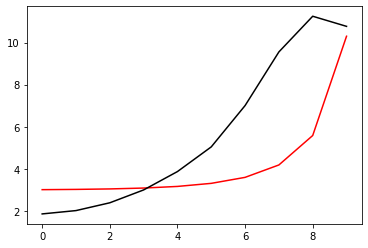

6834 1.1588427700226562 -0.88803945806882 0.8826573837965435
[ 1.86525927  2.02178686  2.39062621  3.00006463  3.87166923  5.04590431
  7.00813202  9.55944942 11.26198838 10.7764876 ]


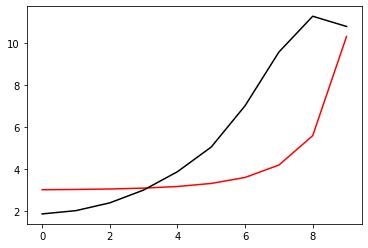

7035 2.1798180629856714 -0.8882688848242902 0.8827496710249544
[ 1.86705737  2.02193999  2.38946257  2.99804338  3.86946063  5.0454748
  7.00887457  9.5641615  11.27555683 10.78484274]


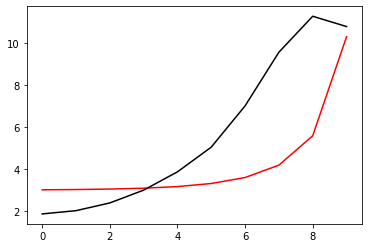

7236 1.171691623850792 -0.8883870800297519 0.8828803354584281
[ 1.86901295  2.02225973  2.38846354  2.99618247  3.86740653  5.04517551
  7.00971415  9.56888789 11.28906002 10.79319204]


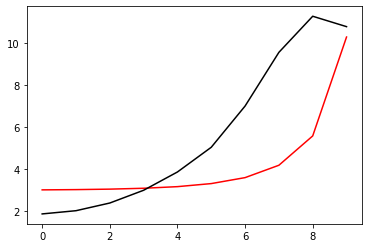

7437 1.1854865645891792 -0.8884153509556737 0.8830484881436019
[ 1.8710758   2.02270881  2.38760492  2.99447148  3.86551289  5.0450359
  7.01071451  9.57373427 11.30262462 10.8016157 ]


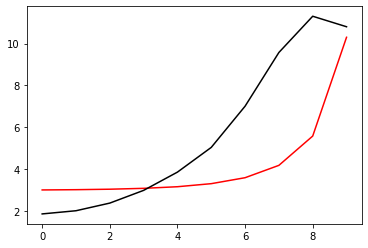

7638 1.1441321622385976 -0.8883739207597118 0.8832458296657605
[ 1.87324665  2.02323181  2.38677917  2.99275163  3.86356432  5.04476696
  7.0114847   9.57820869 11.315741   10.80976438]


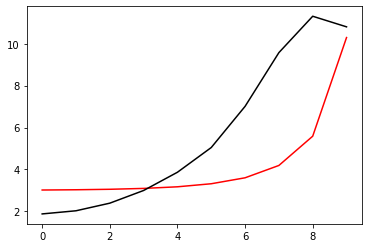

7839 1.2243897344456878 -0.8882990764397393 0.8834004328290422
[ 1.87557791  2.02394743  2.38616691  2.99126496  3.86187171  5.04477028
  7.01255375  9.58296529 11.32908082 10.81803283]


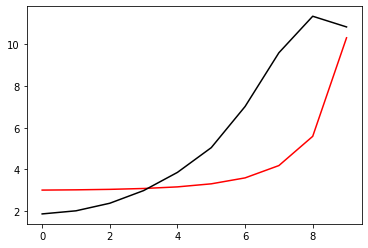

8040 3.3415215501145505 -0.8883087315957519 0.8834863985421146
[ 1.87788736  2.02462152  2.38548691  2.98968541  3.86006171  5.04461592
  7.01342454  9.58747192 11.34216247 10.82603255]


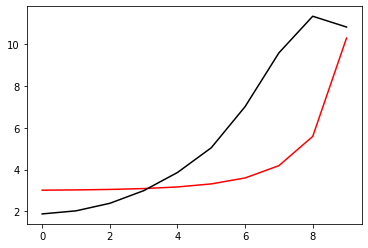

8241 1.182711831532857 -0.8884203590349398 0.8835095505774394
[ 1.88008638  2.02523027  2.38477486  2.98810625  3.85829047  5.04454144
  7.01445183  9.59221282 11.35551869 10.83419793]


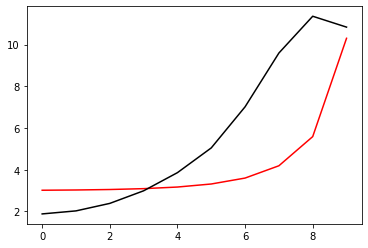

8442 1.1317128622875277 -0.8885837337171428 0.883575249898658
[ 1.88207024  2.02561562  2.38382329  2.98627123  3.85624738  5.04416572
  7.01515769  9.59662373 11.36858838 10.84218834]


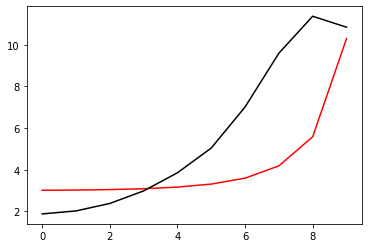

8643 0.3779979107969419 -0.8889122390695944 0.8836220410284868
[ 1.88368525  2.02569684  2.3826204   2.98423803  3.85406999  5.04373596
  7.01595725  9.60132158 11.38208747 10.85041744]


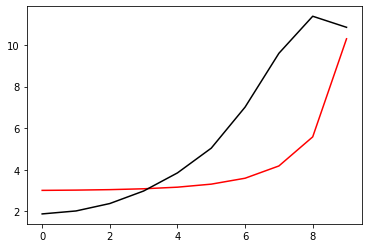

8844 1.1730442959726095 -0.8891384897786192 0.8836822736142828
[ 1.88551896  2.02596665  2.38156876  2.98231736  3.85196133  5.04330166
  7.01664627  9.60574478 11.39519781 10.85844666]


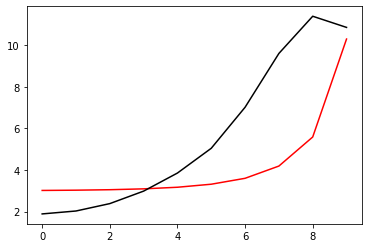

9045 2.1974748450491175 -0.8893207785186138 0.883723767818267
[ 1.88748224  2.02639717  2.38069764  2.98059506  3.85007075  5.04309694
  7.0175837   9.61039402 11.40847893 10.86662221]


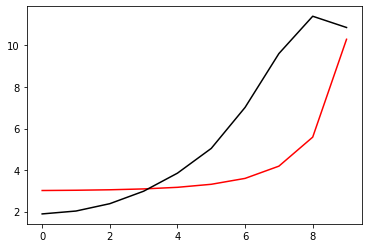

9246 1.1838547464554403 -0.8893594514158839 0.8838239783599005
[ 1.88965228  2.02700913  2.37997534  2.97898751  3.84825633  5.04290211
  7.01843591  9.6148081  11.42141872 10.87462928]


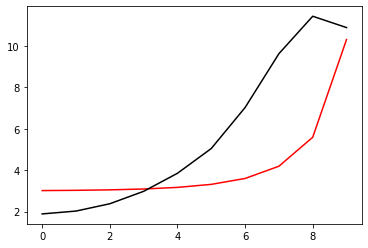

9447 1.1918182116364902 -0.8893044039421344 0.8839275475975265
[ 1.89203569  2.02782957  2.37944833  2.97756085  3.8466068   5.04283654
  7.01936561  9.61919424 11.43423451 10.88258675]


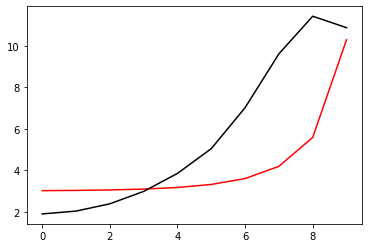

9648 1.153330254172598 -0.8892932853428075 0.8840873565382139
[ 1.89416832  2.02842932  2.37872023  2.97595169  3.84479751  5.04263341
  7.02021338  9.62357493 11.4471205  10.89057502]


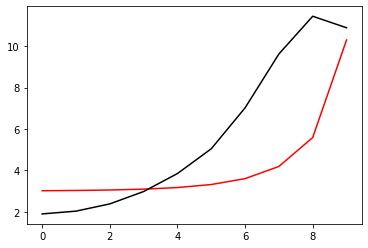

9849 1.2152651106180046 -0.8893332014857518 0.8842758709776046
[ 1.89611774  2.02884187  2.37779356  2.97413267  3.84276871  5.04219107
  7.02081557  9.62771454 11.45980671 10.8984291 ]


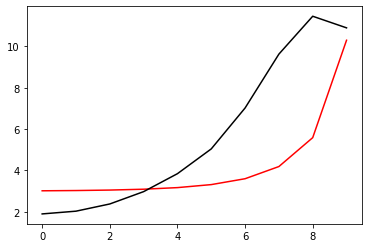

In [141]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

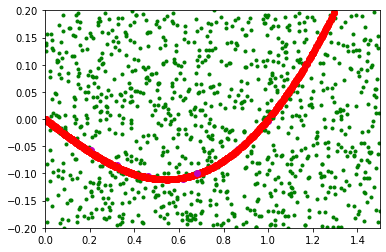

In [142]:
for i in range (10):
    [Positive0[i], Positive1[i]]=NN_func_01(h, m2_2, lam2, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, m2_2, lam2, Negative[i])
for i in range (10):
    x_data1[i]=[v[0] for v in Positive0[i]]
    y_data1[i]=[v[1] for v in Positive0[i]]
    x_data2[i]=[v[0] for v in Positive1[i]]
    y_data2[i]=[v[1] for v in Positive1[i]]
    x_data3[i]=[v[0] for v in Negative0[i]]
    y_data3[i]=[v[1] for v in Negative0[i]]
    x_data4[i]=[v[0] for v in Negative1[i]]
    y_data4[i]=[v[1] for v in Negative1[i]]
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()